# 0. General

### Imports

In [1]:
import os
import warnings
import logging
from absl import logging as absl_logging

os.environ['TFDS_DATA_DIR'] = "/mnt/sdb/home/ml/tensorflow_datasets/"
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

warnings.simplefilter(action='ignore', category=FutureWarning)
absl_logging.set_verbosity(absl_logging.ERROR)

In [2]:
'''

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

import ipywidgets as widgets


import tensorflow_datasets as tfds


from sklearn.manifold import TSNE
from neurokit2.signal import signal_smooth
from scipy.spatial import distance_matrix
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE


from src.utils.helper import Helper
from src.utils.visualizations import Visualizations
'''

'\n\nimport numpy as np\nfrom matplotlib import pyplot as plt\nimport seaborn as sns\nimport tensorflow as tf\n\nimport ipywidgets as widgets\n\n\nimport tensorflow_datasets as tfds\n\n\nfrom sklearn.manifold import TSNE\nfrom neurokit2.signal import signal_smooth\nfrom scipy.spatial import distance_matrix\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.manifold import TSNE\n\n\nfrom src.utils.helper import Helper\nfrom src.utils.visualizations import Visualizations\n'

In [3]:
from src.utils.helper import Helper
from src.utils.visualizations import Visualizations

import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import ipywidgets as widgets
from matplotlib import pyplot as plt
import seaborn as sns

2024-02-23 20:51:51.811488: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 20:51:51.811542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 20:51:51.871445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-23 20:51:52.632922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
DPI = 600
PATH = '../results/run_3/'

### Experiments

In [5]:
datasets = {
    'name': ['synth:1.0.9'],
    'split': 'train',
    'shuffle_size': 1024,
    'batch_size': 1024,
}

In [6]:
df = Helper.experiments(datasets, path=PATH)

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 1s 32ms/step


/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 0s 17ms/step


/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 0s 17ms/step


/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 0s 16ms/step


/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer Orthogonal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


8/8 [==============================] - 0s 18ms/step


In [7]:
df.sort_values(by=['MIG', 'latent_dim', 'alpha', 'beta', 'gamma']).tail()

alpha  beta  gamma       loss      recon        mi         tc       dw_kl  \
20   0.10  0.40   0.10  48.470100  36.008671  6.028219   5.691223   95.821205   
1    0.05  0.20   0.05  45.650776  35.361412  6.049183   6.335815  174.394806   
12   0.05  0.20   0.05  42.267979  31.454027  6.198841   9.961824  170.232880   
29   0.01  0.04   0.01  32.668133  25.632713  6.244719  21.661219  610.652344   
7    0.20  0.80   0.20  59.269009  42.384178  5.845186   3.607689   64.148209   

                  time  latent_dim  epoch       total       MIG  
20 2024-02-17 10:33:08          12     79  143.549317  0.184045  
1  2024-02-16 00:28:47           8    107  222.141216  0.186104  
12 2024-02-16 20:15:23          20     79  217.847572  0.215449  
29 2024-02-17 21:32:01          24    135  664.190995  0.219615  
7  2024-02-16 15:25:04          12     79  115.985262  0.234189

In [8]:
#Helper.pandas_to_latex(df)

### Path Selection

In [9]:
val = Helper.select_path(PATH)

In [10]:
val

Dropdown(description='Base path:', options=('../results/run_3/2024-02-15_23-13-43/', '../results/run_3/2024-02…

In [11]:
path_base = val.value + '/'
path_base = PATH + '2024-02-16_15-25-04/'
model = tf.keras.models.load_model(path_base + 'model_best/')

### General

In [12]:
params = Helper.load_yaml_file(path_base + 'params.json')

In [13]:
train_progress = pd.read_csv(path_base + '/training/training_progress.csv')

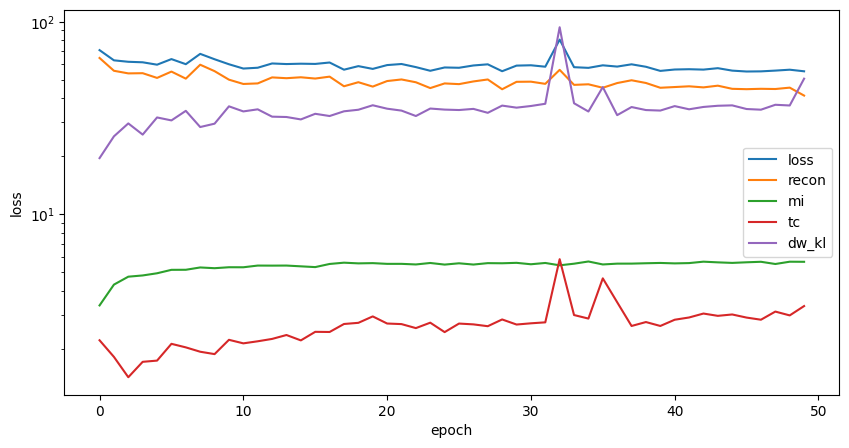

In [14]:
Visualizations.plot_trainings_process(train_progress[0:50], ['loss', 'recon', 'mi', 'tc', 'dw_kl'])

# 1. Disentanglement

In [20]:
datasets = {
    'name': ['zheng', 'synth:1.0.9', 'synth:1.0.11'],
    'split': 'train',
    'shuffle_size': 1024,
    'batch_size': 1024,
}
embeddings, ld = Helper.get_embeddings(model, datasets)

11/11 [==============================] - 0s 22ms/step


In [21]:
struct = Helper.feature_axis_mapping(embeddings, ld)
interpretation = Helper.readable_axis_mapping(struct)

Visualizations.print_axis_interpretation(interpretation)

Dimension 	| Features and Scores (ordered by score)
____________________________________________________________________________
0		|p_height: 0.33736	|t_height: 0.2895	|r_width: 0.2251	|s_width: 0.14039	|
1		|p_height: 0.47015	|p_height: 0.06738	|p_angle: 0.0624	|q_width: 0.04142	|
2		|r_width: 0.21962	|age: 0.09715	|t_height: 0.07048	|q_width: 0.06194	|
3		|p_height: 0.82414	|r_width: 0.24897	|p_height: 0.14431	|q_width: 0.11757	|
4		|s_width: 0.29907	|q_width: 0.15495	|t_height: 0.15408	|r_width: 0.13616	|
5		|p_height: 0.49542	|p_width: 0.23605	|p_height: 0.08239	|q_width: 0.05343	|
6		|r_width: 0.39818	|p_height: 0.32707	|qrs_duration: 0.11864	|q_width: 0.11651	|
7		|t_height: 0.89084	|t_height: 0.29439	|p_width: 0.26556	|ventricular_rate: 0.26081	|
8		|p_height: 0.5763	|p_height: 0.16058	|t_height: 0.16034	|p_angle: 0.07372	|
9		|t_height: 0.26483	|p_width: 0.21262	|r_width: 0.13141	|qrs_duration: 0.12186	|
10		|qt_interval: 0.13608	|t_offset: 0.11994	|p_height: 0.07818	|qrs_coun

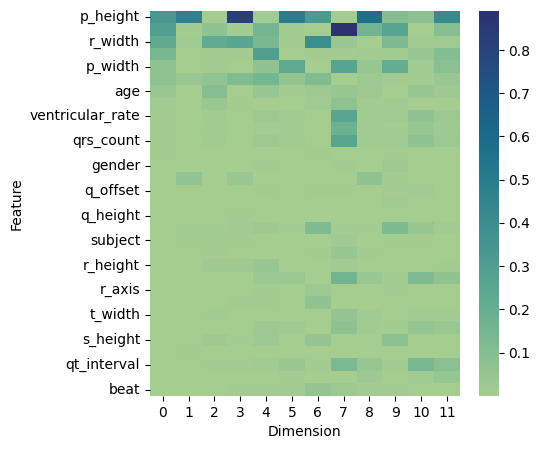

In [22]:
Visualizations.plot_axis_relation(interpretation, ld, save_path='../analysis/media/axis_feature_corrplot_axis_relationelation.png')

/mnt/sdb/home/ml/Desktop/VECG/src/utils/visualizations.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


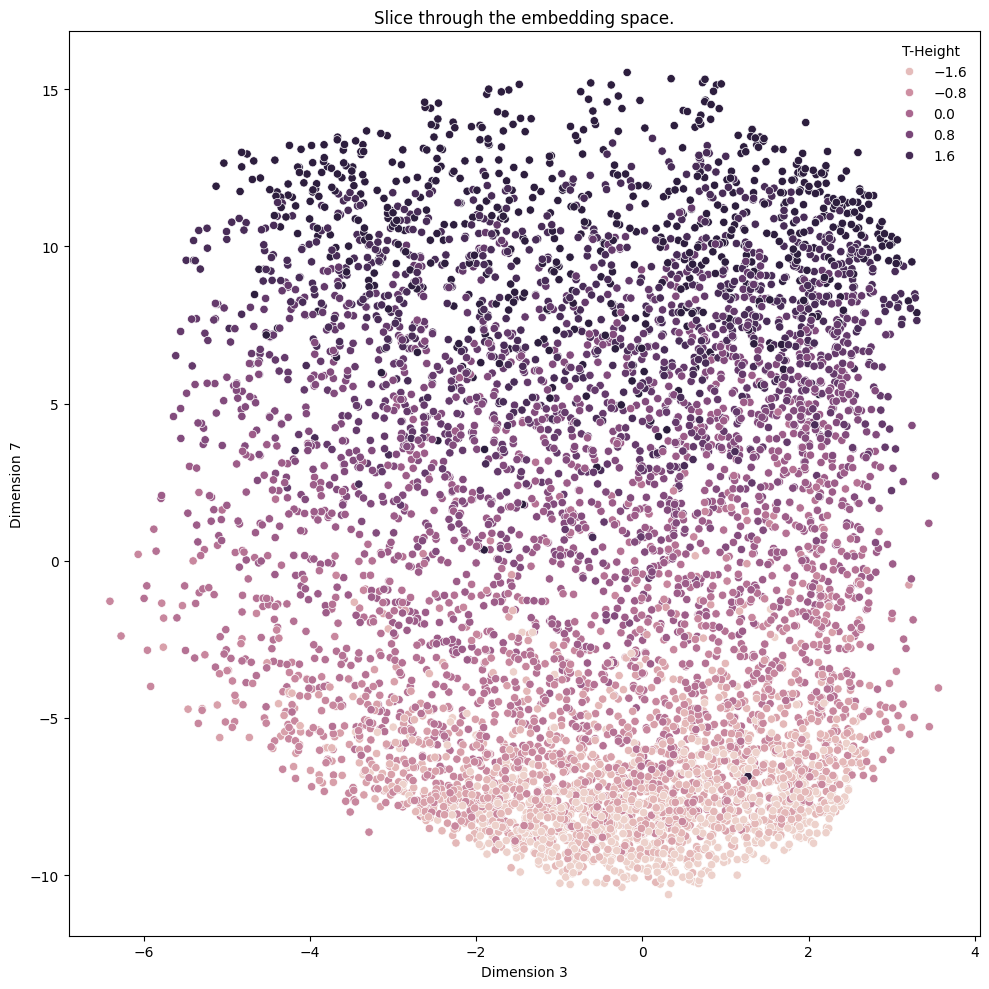

In [23]:
Visualizations.plot_embedding_slice(embeddings[1], 3, 7, 't_height', 'T-Height', '../analysis/media/embedding_synth_theight.png')

/mnt/sdb/home/ml/Desktop/VECG/src/utils/visualizations.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


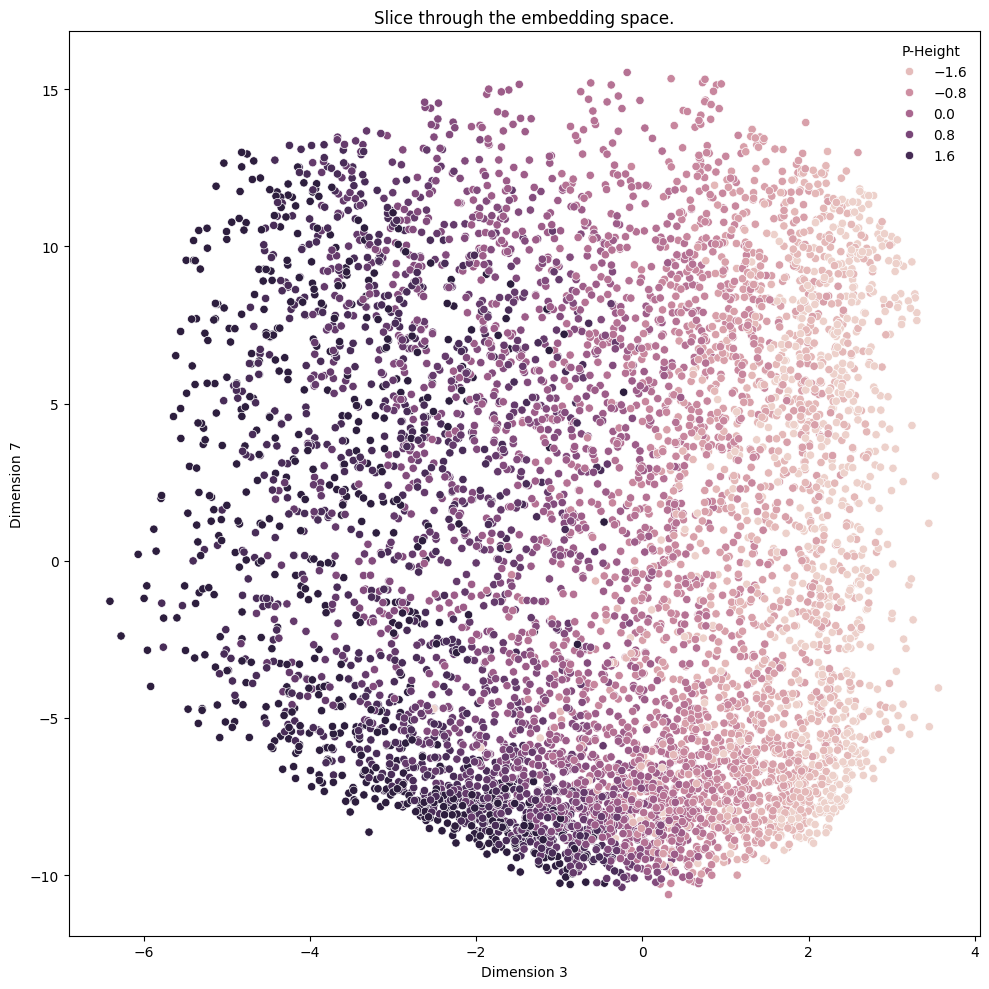

In [24]:
Visualizations.plot_embedding_slice(embeddings[1], 3, 7, 'p_height', 'P-Height', '../analysis/media/embedding_synth_pheight1.png')

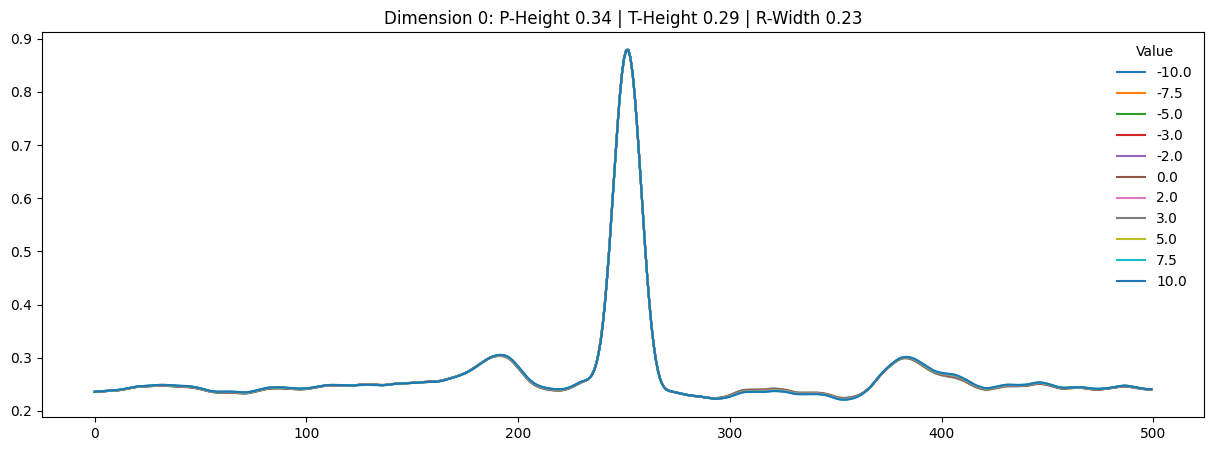

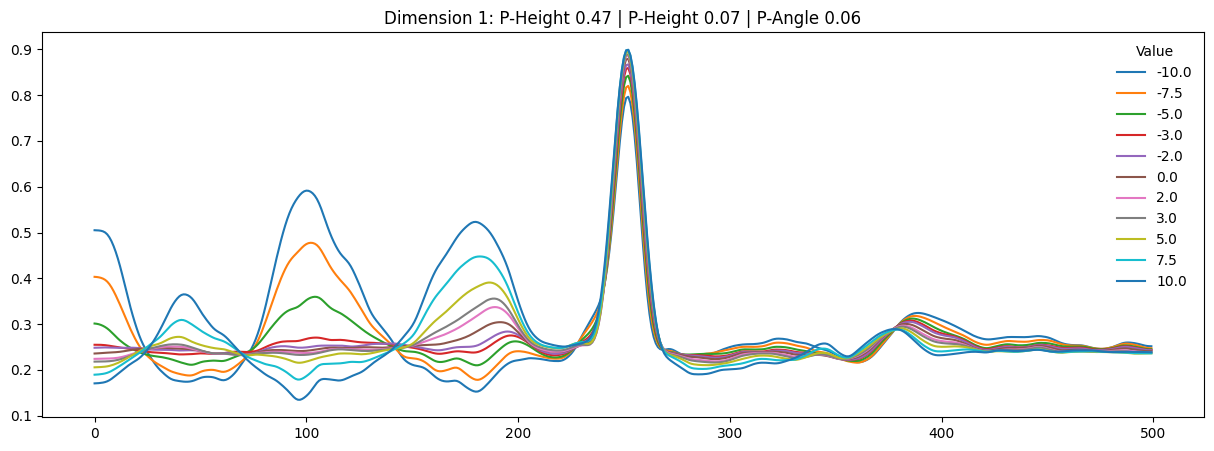

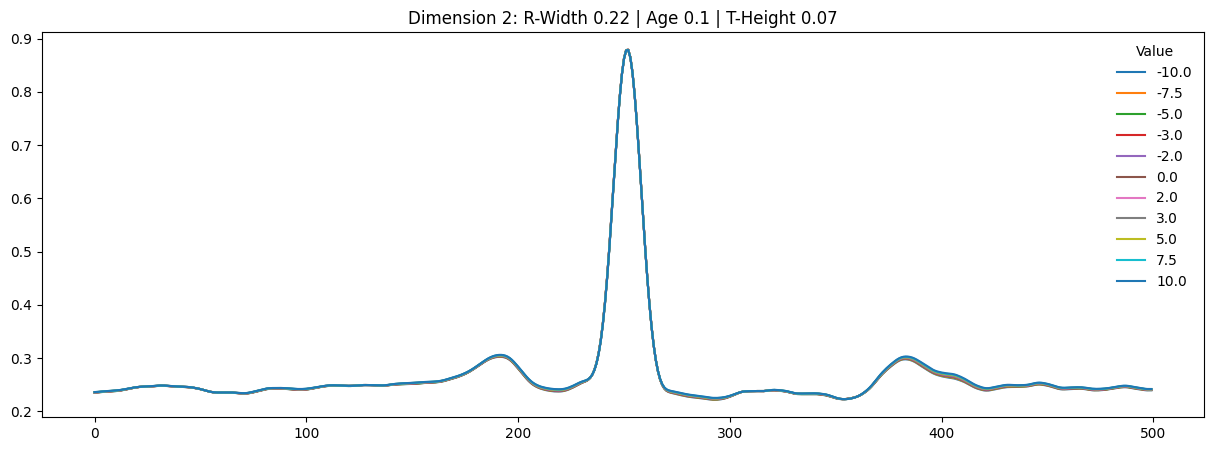

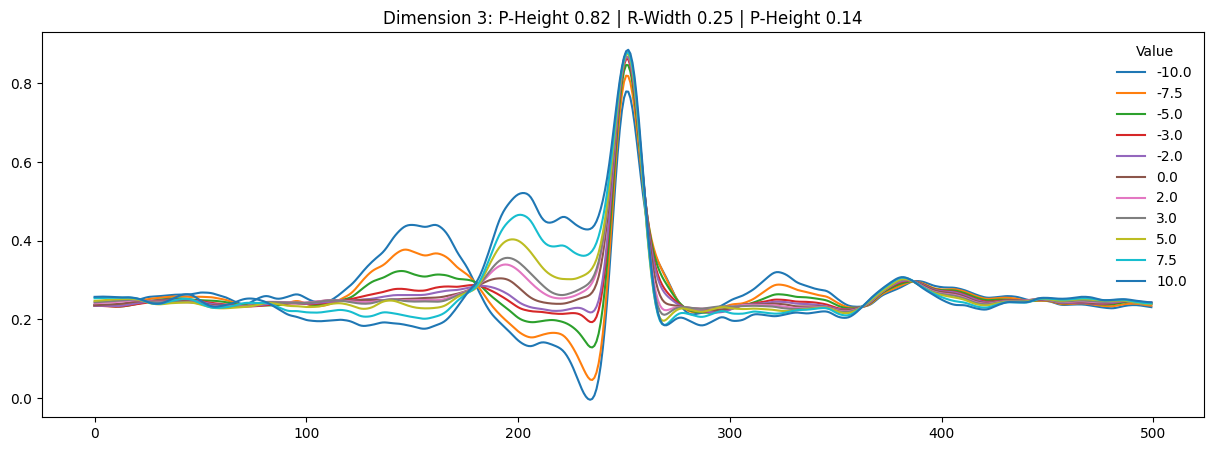

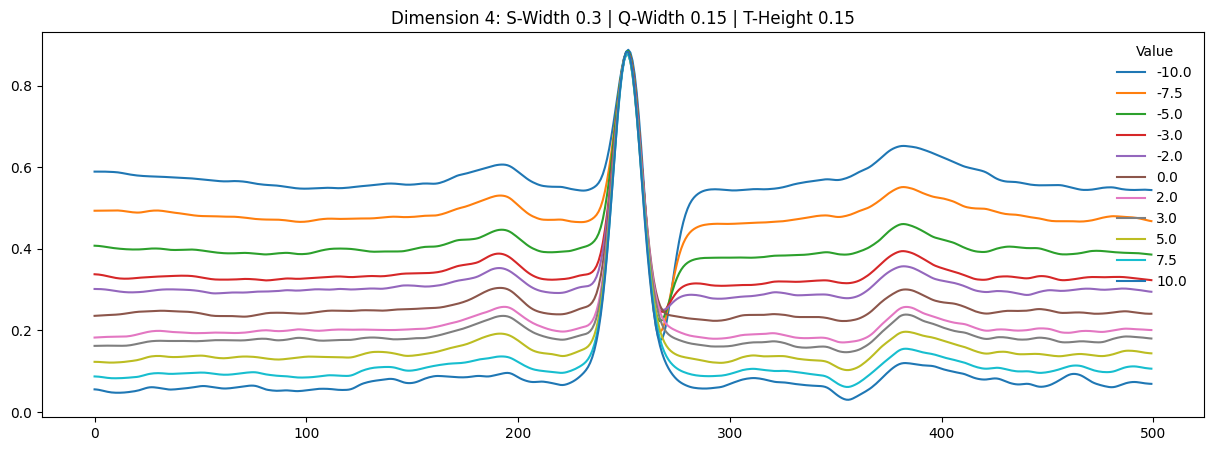

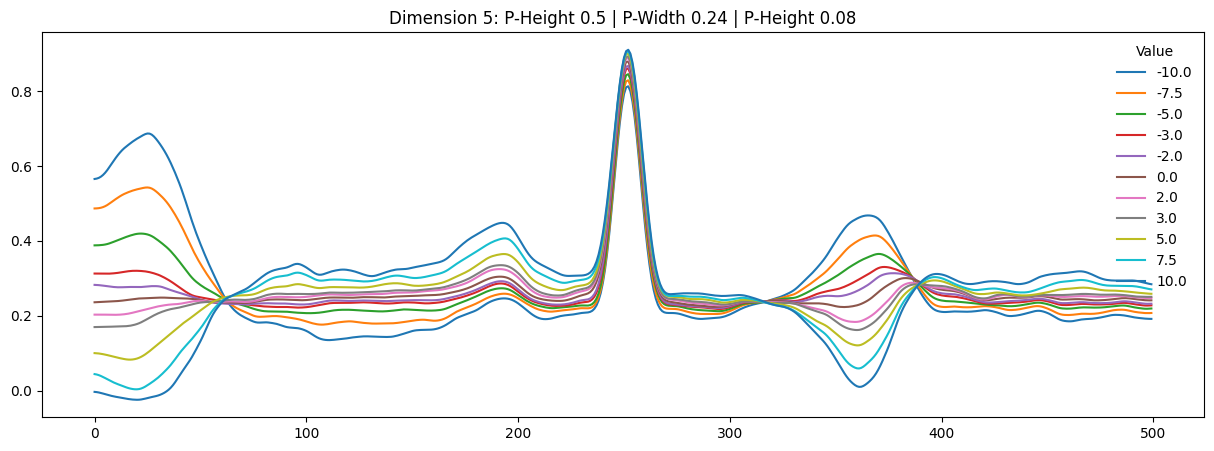

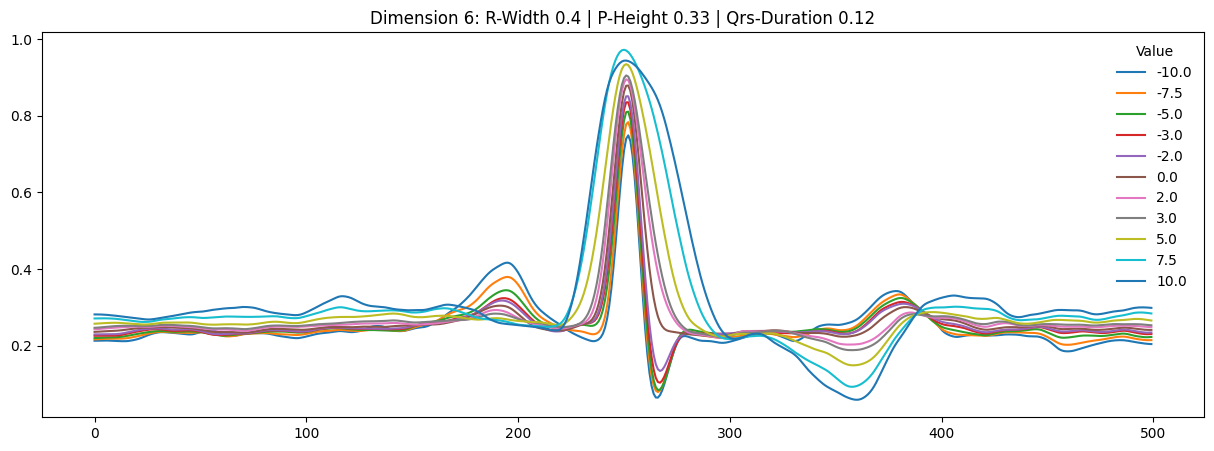

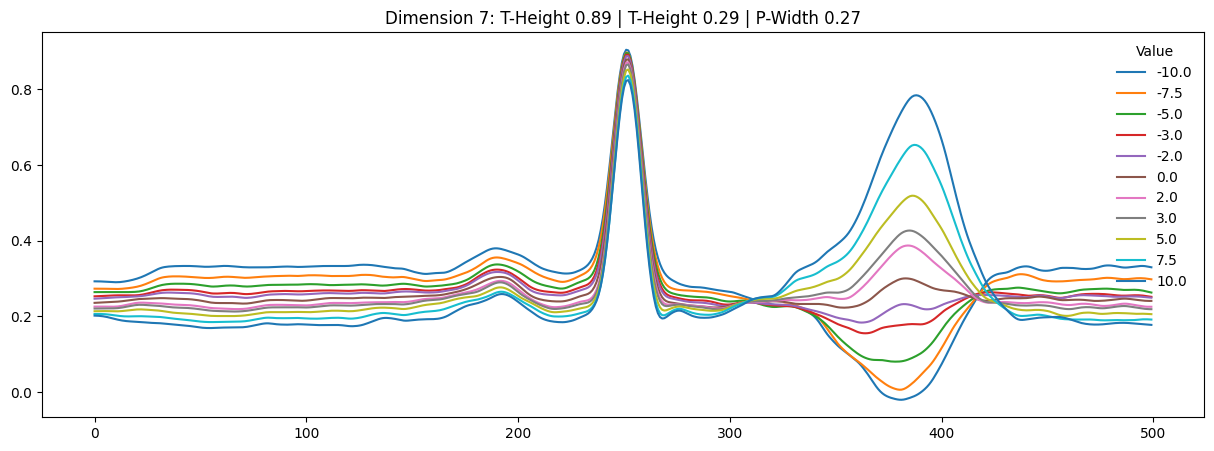

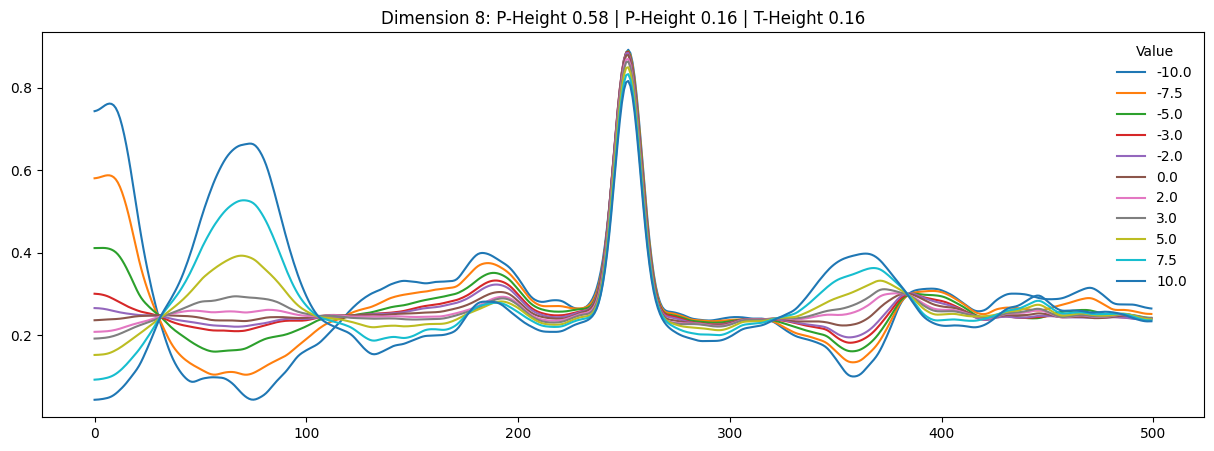

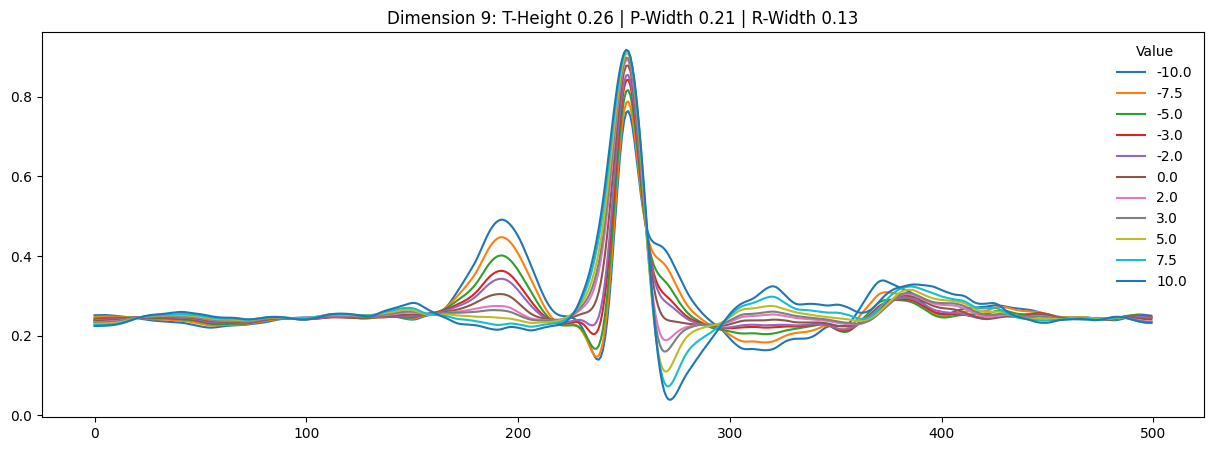

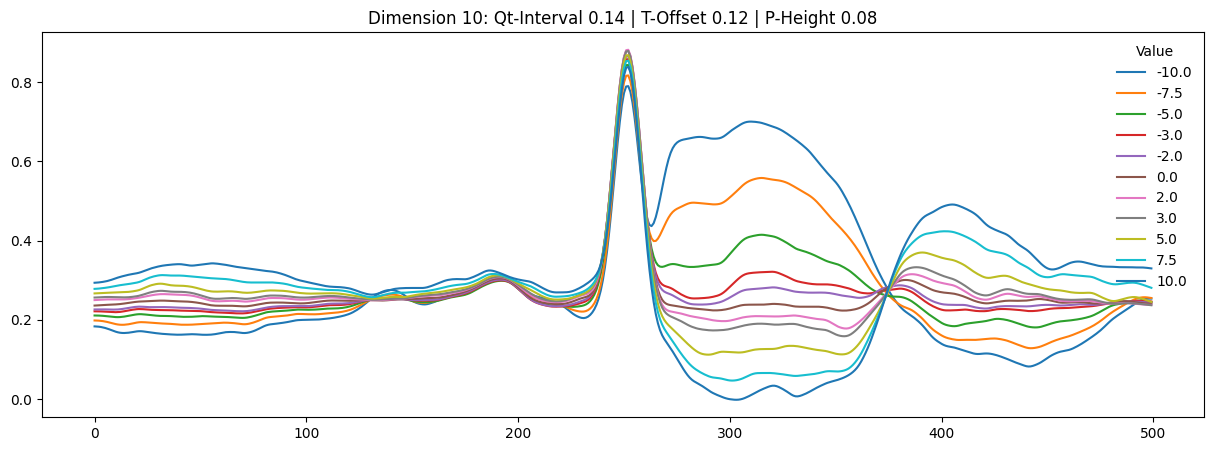

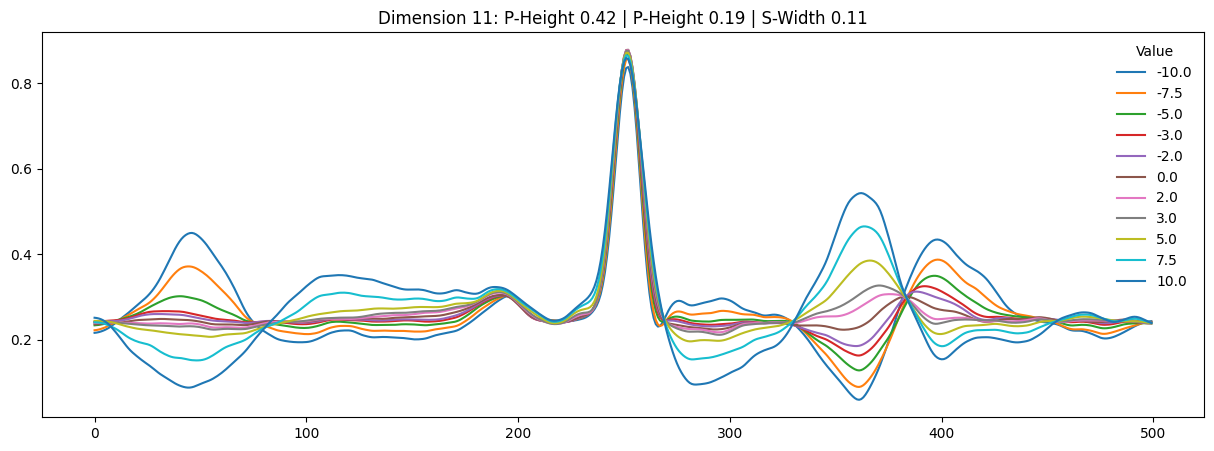

In [27]:
for k in range(0, ld):
    accessor = 'Dim ' + str(k)
    feature = interpretation[accessor]['Features']
    score = interpretation[accessor]['Scores']
    a = feature[0].replace('_', ' ').title().replace(' ', '-') + ' ' + str(np.round(np.float16(score[0]), 2)) + ' | '
    b = feature[1].replace('_', ' ').title().replace(' ', '-') + ' ' + str(np.round(np.float16(score[1]), 2)) + ' | '
    c = feature[2].replace('_', ' ').title().replace(' ', '-') + ' ' + str(np.round(np.float16(score[2]), 2))
    title = a+b+c
    Visualizations.plot_along_axis(
        k, title, ld,
        [-10.0, -7.5, -5.0, -3.0, -2.0, 0.0, 2.0, 3.0, 5.0, 7.5, 10.0],
        path='../analysis/media/', model=model,
    )

In [31]:
widgets.interact(Visualizations.reconstruct, dim=range(0, ld), x=(-25.0, 25.0, 0.5), model=[model], ld=[ld])

interactive(children=(Dropdown(description='dim', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), value=0), Fl…

<function src.utils.visualizations.Visualizations.reconstruct(dim, x, model, ld)>

# 2. Anomaly Detection

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Medalcare

In [33]:
dataset_medalcare_train = {'name': ['medalcare'], 'split': 'train', 'shuffle_size': 1024, 'batch_size': 1024}
dataset_medalcare_validation = {'name': ['medalcare'], 'split': 'validation', 'shuffle_size': 1024, 'batch_size': 1024}
dataset_medalcare_test = {'name': ['medalcare'], 'split': 'test', 'shuffle_size': 1024, 'batch_size': 1024}

In [34]:
df_medalcare_train, ld = Helper.get_embeddings(model, dataset_medalcare_train)
df_medalcare_validation, _ = Helper.get_embeddings(model, dataset_medalcare_validation)
df_medalcare_test, _ = Helper.get_embeddings(model, dataset_medalcare_test)

28/28 [==============================] - 3s 114ms/step


In [35]:
df_medalcare_train = Helper.number_to_category(df_medalcare_train[0])
df_medalcare_validation = Helper.number_to_category(df_medalcare_validation[0])
df_medalcare_test = Helper.number_to_category(df_medalcare_test[0])

In [36]:
df_medalcare_train['diagnosis_binary'] = df_medalcare_train.diagnosis != 'sinus'
df_medalcare_validation['diagnosis_binary'] = df_medalcare_validation.diagnosis != 'sinus'
df_medalcare_test['diagnosis_binary'] = df_medalcare_test.diagnosis != 'sinus'

In [37]:
include = ['sinus', 'rbbb', 'lbbb', 'avblock']

In [38]:
df_medalcare_train = df_medalcare_train[df_medalcare_train.diagnosis.isin(include)]
df_medalcare_validation = df_medalcare_validation[df_medalcare_validation.diagnosis.isin(include)]
df_medalcare_test = df_medalcare_test[df_medalcare_test.diagnosis.isin(include)]

In [39]:
X_train, y_train, y_train_b  = df_medalcare_train.iloc[:, 0:ld], df_medalcare_train['diagnosis'], df_medalcare_train['diagnosis_binary']
X_val, y_val, y_val_b = df_medalcare_validation.iloc[:, 0:ld], df_medalcare_validation['diagnosis'], df_medalcare_validation['diagnosis_binary']
X_test, y_test, y_test_b  = df_medalcare_test.iloc[:, 0:ld], df_medalcare_test['diagnosis'], df_medalcare_test['diagnosis_binary']

#### Multiclass

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [46]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
knn = KNeighborsClassifier()
pipeline = Pipeline(steps=[('imputer', imputer), ('knn', knn)])

param_grid = {
    'knn__n_neighbors': range(2, 50)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=20, scoring='accuracy')
grid_search.fit(X_val, y_val)

best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k} with accuracy: {best_score}')

Best k: 3 with accuracy: 0.9555424303528255


In [48]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

test_fold = np.concatenate([
    -np.ones(X_train.shape[0]), # Mark training data as -1
    np.zeros(X_val.shape[0]) # Mark validation data as 0
])

ps = PredefinedSplit(test_fold)

imputer = SimpleImputer(strategy='constant', fill_value=0)

knn = KNeighborsClassifier()

pipeline = Pipeline(steps=[('imputer', imputer), ('knn', knn)])

param_grid = {
    'knn__n_neighbors': range(3, 50)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=ps, scoring='accuracy')

grid_search.fit(X_combined, y_combined)

best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k} with accuracy: {best_score}')

Best k: 25 with accuracy: 0.7928331466965286


<Figure size 1500x1500 with 0 Axes>

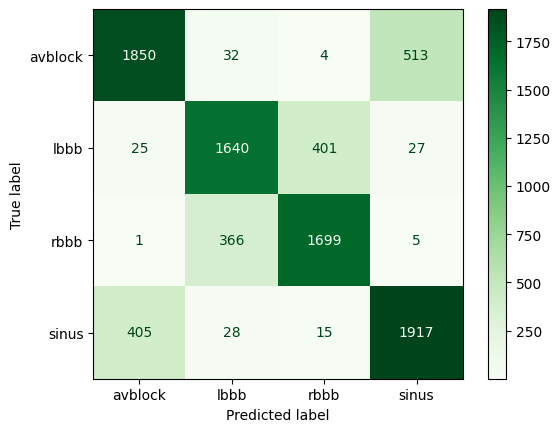

In [49]:
cm, classes = Visualizations.plot_confustion_matrix(
    X_train, X_test, y_train, y_test,
    KNeighborsClassifier(n_neighbors=best_k),
    '../analysis/media/confusion_matrix_multiclass_medalcare_diagnostic.png',
)

In [50]:
Visualizations.print_metrics_multiclass(cm)

Accuracy:   	 0.7959229390681004 



#### Binary

In [51]:
X_combined = np.vstack((X_train, X_val))
y_combined = np.concatenate((y_train_b, y_val_b))

test_fold = np.concatenate([
    -np.ones(X_train.shape[0]),
    np.zeros(X_val.shape[0])
])

ps = PredefinedSplit(test_fold)

imputer = SimpleImputer(strategy='constant', fill_value=0)

knn = KNeighborsClassifier()

pipeline = Pipeline(steps=[('imputer', imputer), ('knn', knn)])

param_grid = {
    'knn__n_neighbors': range(3, 50)
}

grid_search = GridSearchCV(pipeline, param_grid, cv=ps, scoring='accuracy')

grid_search.fit(X_combined, y_combined)

best_k = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k} with accuracy: {best_score}')

Best k: 5 with accuracy: 0.9003359462486002


<Figure size 1500x1500 with 0 Axes>

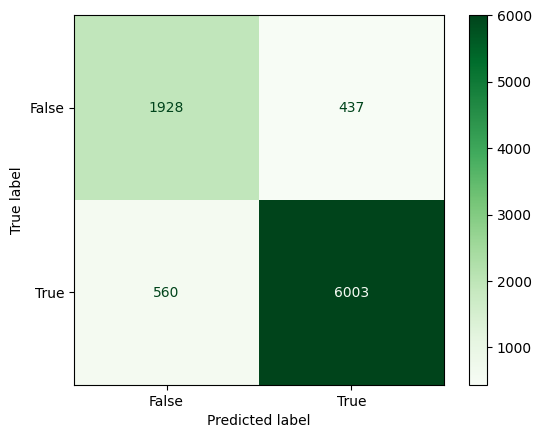

In [52]:
cm, classes = Visualizations.plot_confustion_matrix(
    X_train, X_test, y_train_b, y_test_b,
    KNeighborsClassifier(n_neighbors=best_k),
    '../analysis/media/confusion_matrix_binary_medalcare_diagnostic.png',
)

In [53]:
Visualizations.print_metrics_binary(cm)

Accuracy:   	 0.888328853046595 

Sensitivity:	 0.77491961414791 

Specificity:	 0.9321428571428572 



#### Interpretation

In [54]:
pair_df = df_medalcare_test.loc[:, list([3, 4, 6, 7, 10]) + ['diagnosis']]

In [55]:
cols = {'diagnosis': 'Diagnosis'}
for k in interpretation:
    cols.update({int(k[4:]): interpretation[k]['Features'][0].replace('_', ' ').title().replace(' ', '-')})
pair_df = pair_df.rename(columns=cols)

In [56]:
pair_df = pair_df.fillna(0.0)

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_144659/3454989334.py:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


<Figure size 640x480 with 0 Axes>

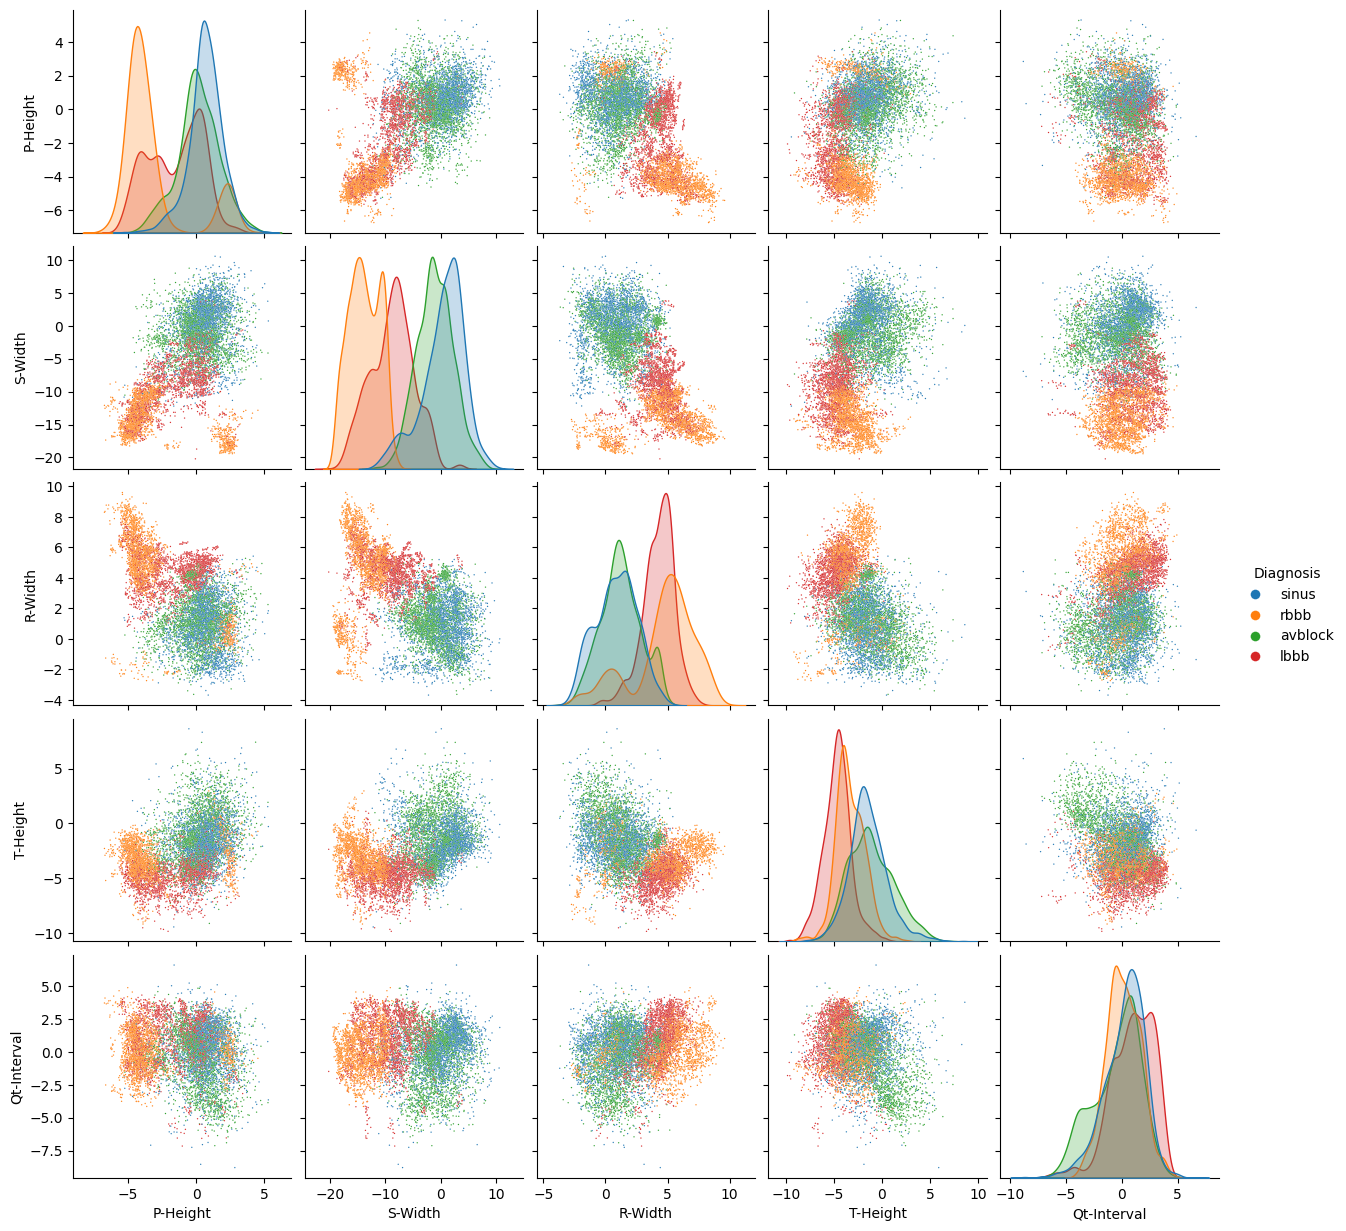

In [62]:
fig = plt.figure()
pairplot = sns.pairplot(pair_df, hue="Diagnosis", plot_kws={"s": 1}, diag_kws={'common_norm': False})
legend = pairplot._legend

# Iterate over the legend handles and set the sizes
for handle in legend.legendHandles:
    handle.set_markersize(7)  # Adjust the size as needed

#plt.show()
fig = pairplot.figure
fig.savefig('../analysis/media/anomaly_interpretation_medalcare.png', dpi=300)

# 3. Personalization

In [15]:
splits = [
    '107', '5484', '6998', '3984', '3111', '4040', '3013', '6607', '4219', '8750', '5665', '9225',
    '8030', '9886', '1851', '1123', '3043', '3369', '6829', '10969', '3088', '9405', '9535', '4993',
    '4209', '10937', '6167', '4688', '6877', '10733', '8412', '10146', '10973', '9345', '2514', '2908',
    '5938', '5015', '9595', '8769', '4786', '2602', '7779', '2826', '1118', '3485', '2980', '10503',
    '7719', '6575', '1722', '7234', '8366', '3948', '5493', '10731', '8111', '2820', '5337', '5369',
    '4184', '9403', '9625', '303', '33', '3274', '1941', '9116', '9283', '3522', '4836', '7107', '251',
    '9071', '6899', '9733', '9440', '457', '2954', '1839', '5865', '8500', '9559', '1277', '1145', '10107',
    '9287', '8443', '9783', '9956', '10090', '3204', '6814', '4553', '6377', '5572', '1178', '5032', '1793', '4453',
]

In [16]:
subjects = ['1851', '2602', '10973', '5938', '10146', '9225']

In [17]:
palette = {'Normal': 'C0', 'PVC': 'C2', 'PAC': 'C1'}

<Figure size 1500x1500 with 0 Axes>

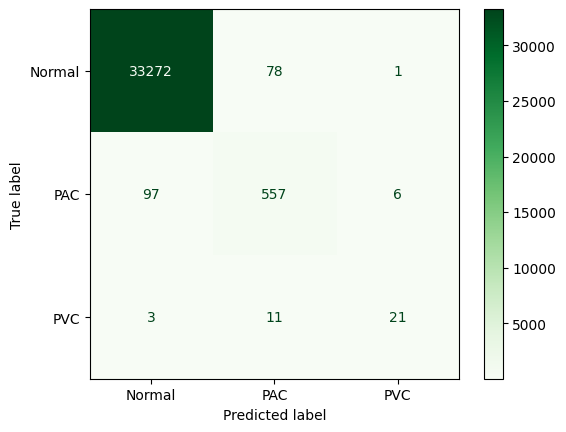

Skipped 8443.csv


<Figure size 1500x1500 with 0 Axes>

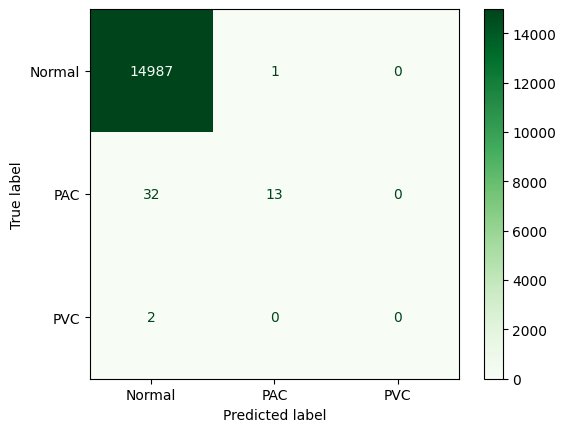

<Figure size 1500x1500 with 0 Axes>

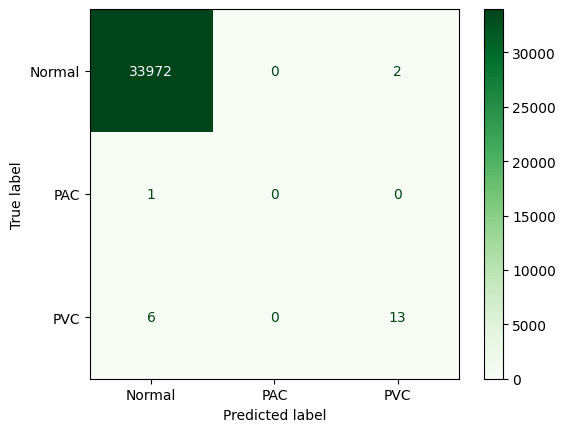

<Figure size 1500x1500 with 0 Axes>

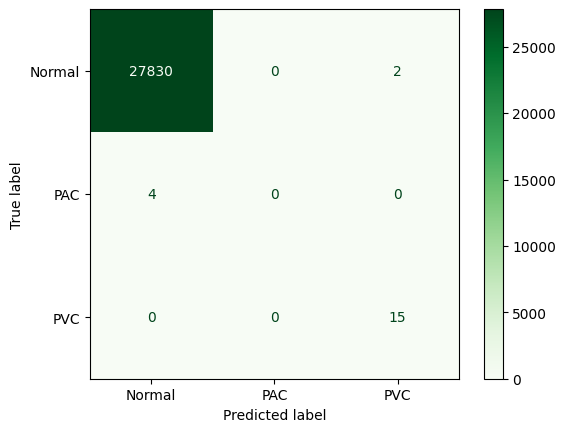

<Figure size 1500x1500 with 0 Axes>

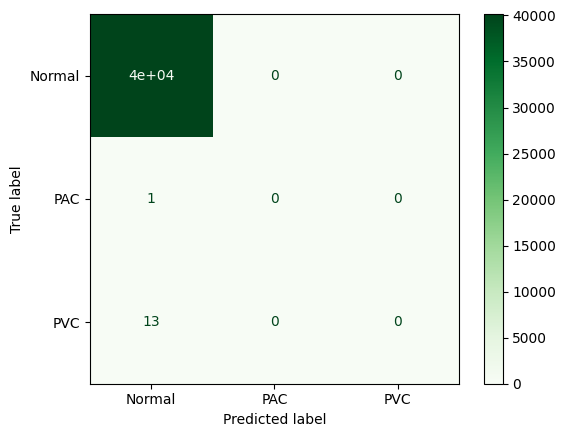

<Figure size 1500x1500 with 0 Axes>

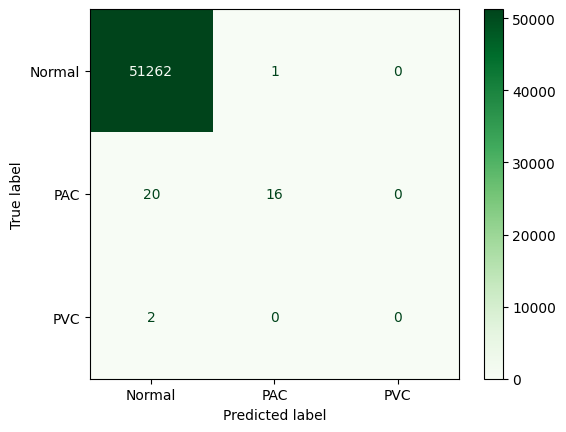

<Figure size 1500x1500 with 0 Axes>

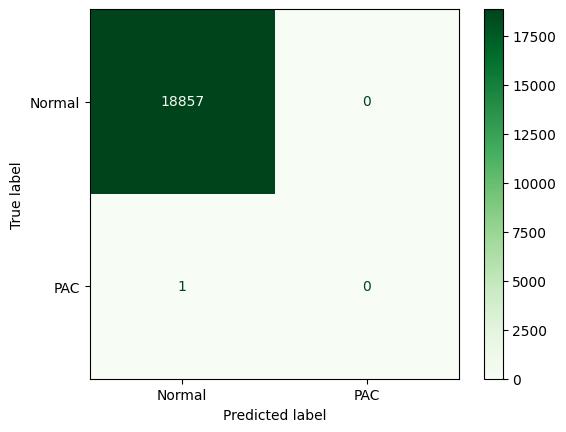

<Figure size 1500x1500 with 0 Axes>

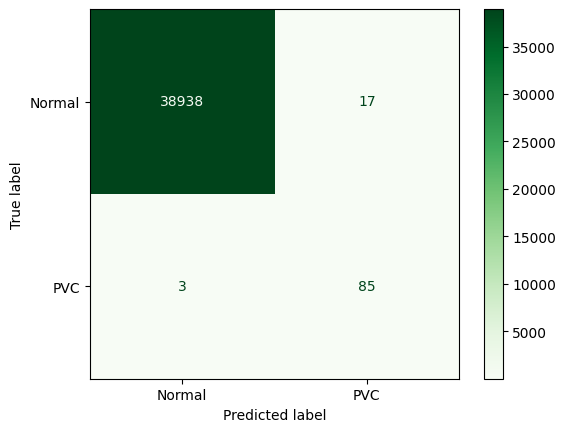

<Figure size 1500x1500 with 0 Axes>

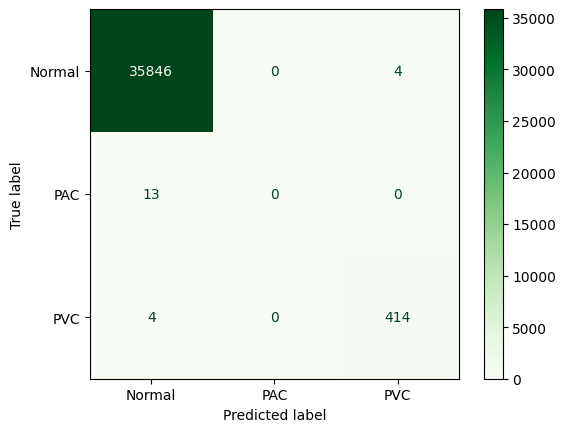

<Figure size 1500x1500 with 0 Axes>

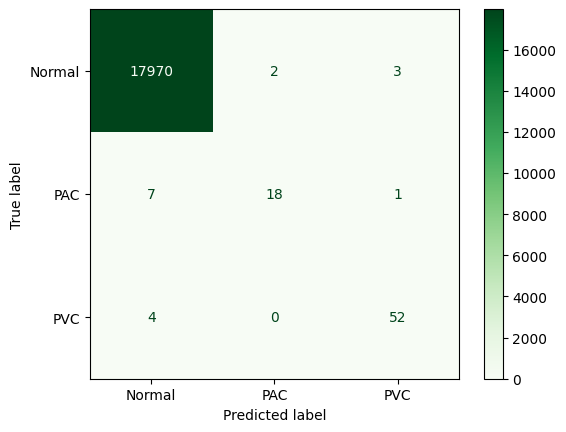

<Figure size 1500x1500 with 0 Axes>

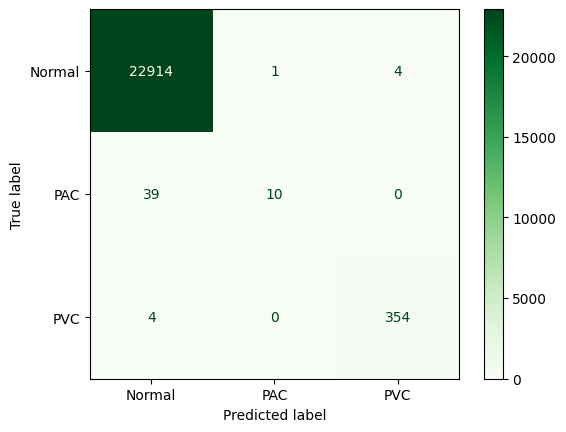

<Figure size 1500x1500 with 0 Axes>

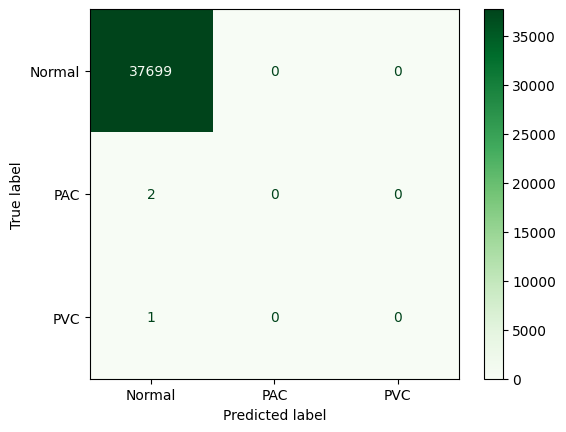

<Figure size 1500x1500 with 0 Axes>

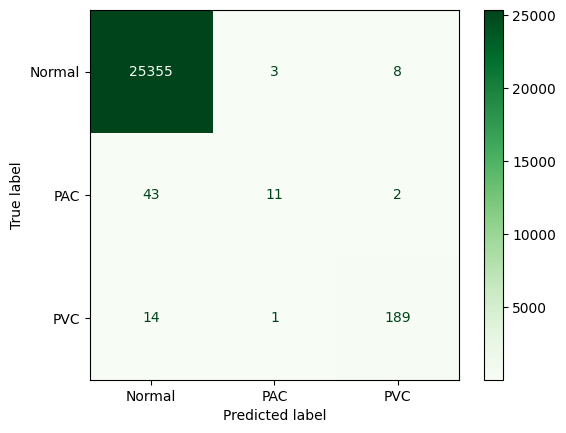

<Figure size 1500x1500 with 0 Axes>

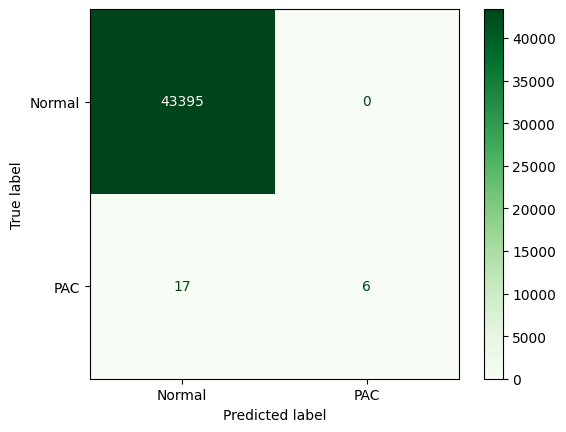

<Figure size 1500x1500 with 0 Axes>

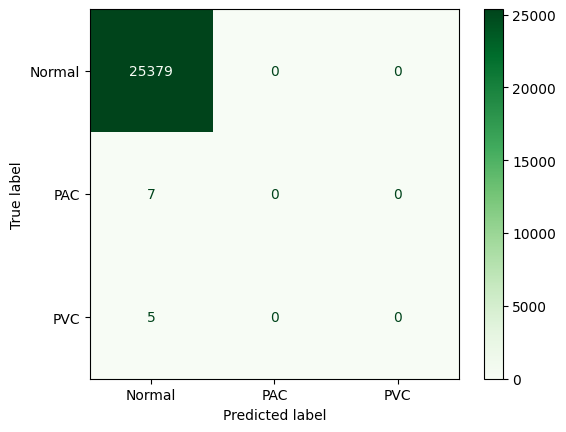

<Figure size 1500x1500 with 0 Axes>

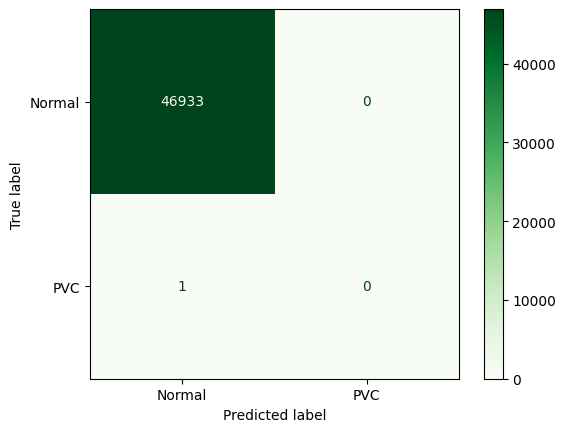

<Figure size 1500x1500 with 0 Axes>

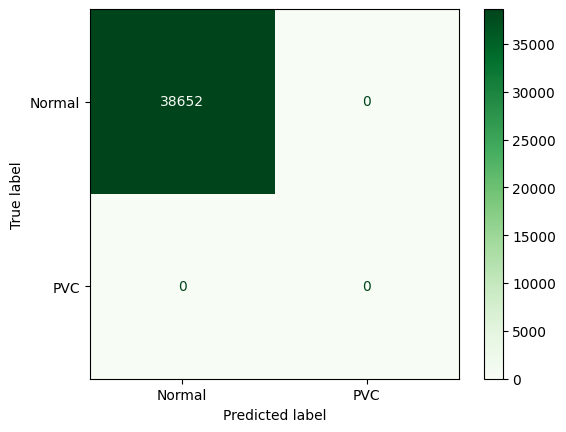

<Figure size 1500x1500 with 0 Axes>

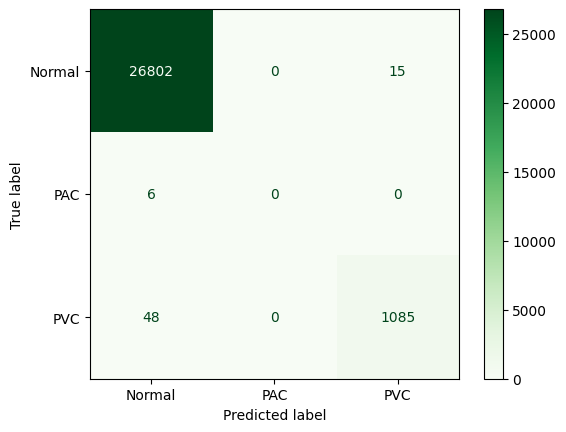

<Figure size 1500x1500 with 0 Axes>

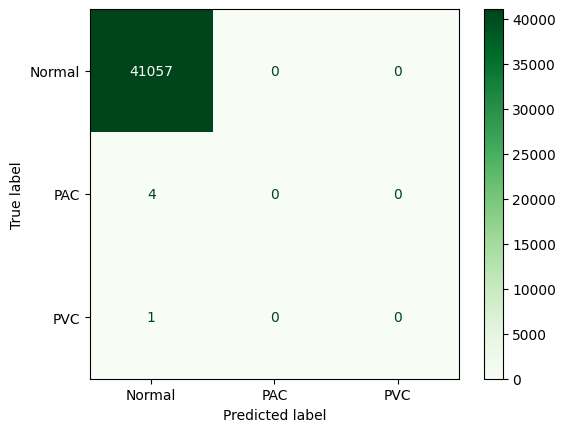

Skipped 5665.csv


<Figure size 1500x1500 with 0 Axes>

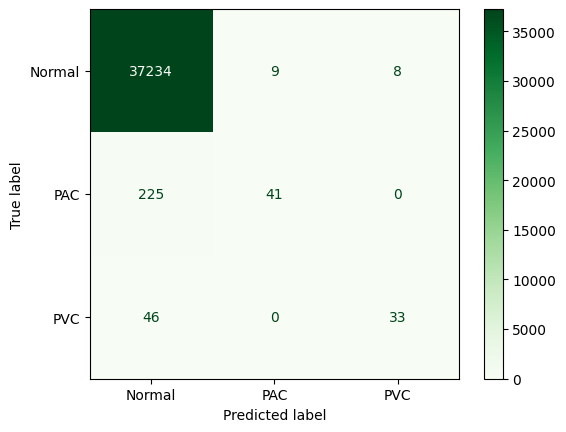

<Figure size 1500x1500 with 0 Axes>

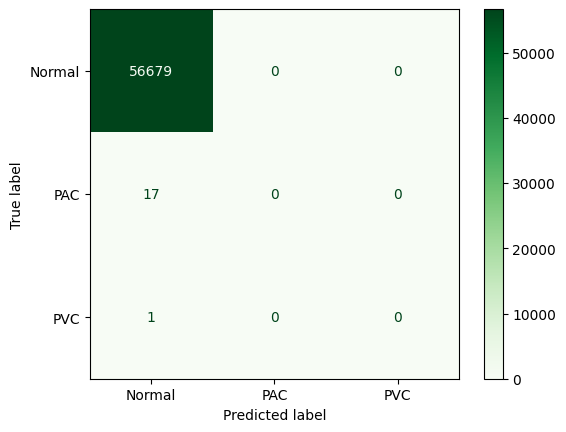

<Figure size 1500x1500 with 0 Axes>

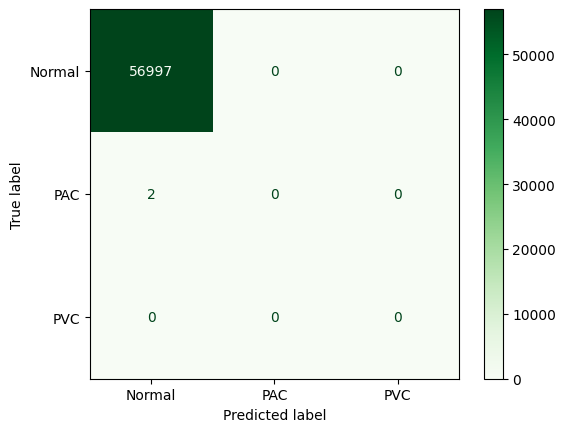

<Figure size 1500x1500 with 0 Axes>

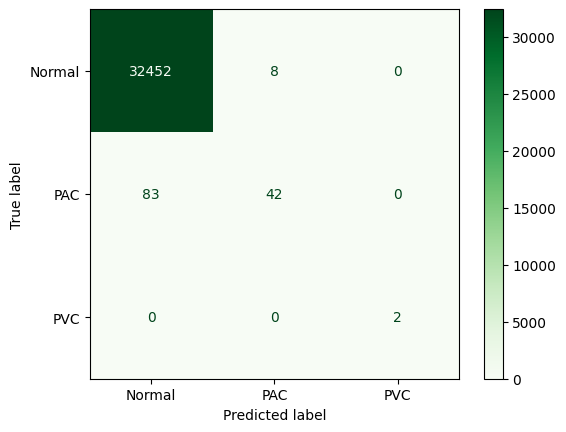

<Figure size 1500x1500 with 0 Axes>

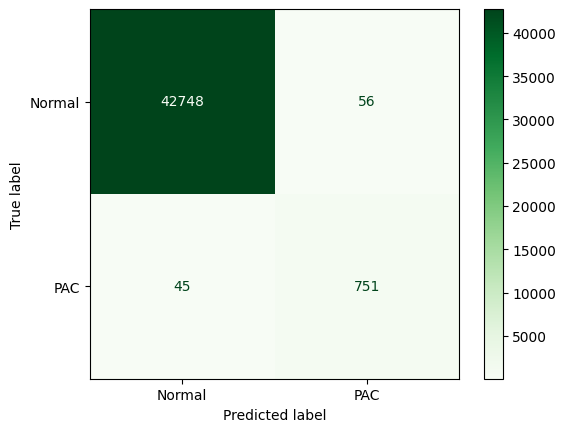

Skipped 9345.csv


<Figure size 1500x1500 with 0 Axes>

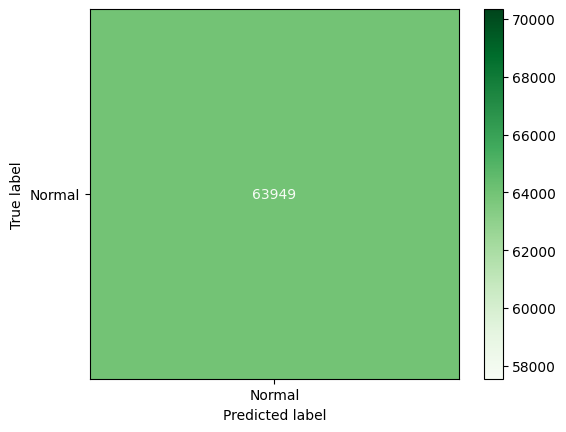

Skipped 9405.csv


<Figure size 1500x1500 with 0 Axes>

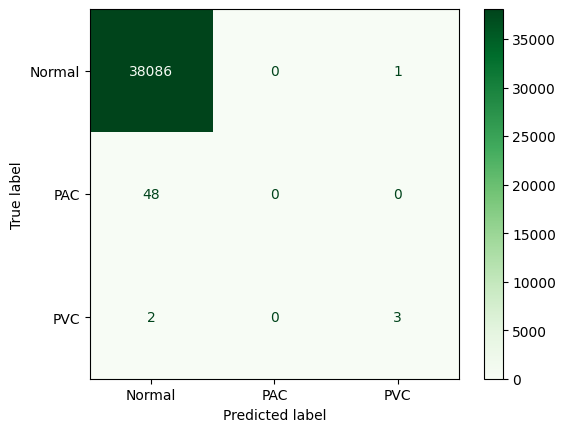

<Figure size 1500x1500 with 0 Axes>

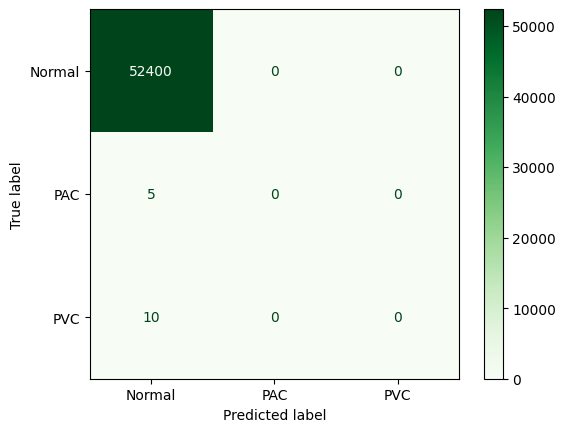

<Figure size 1500x1500 with 0 Axes>

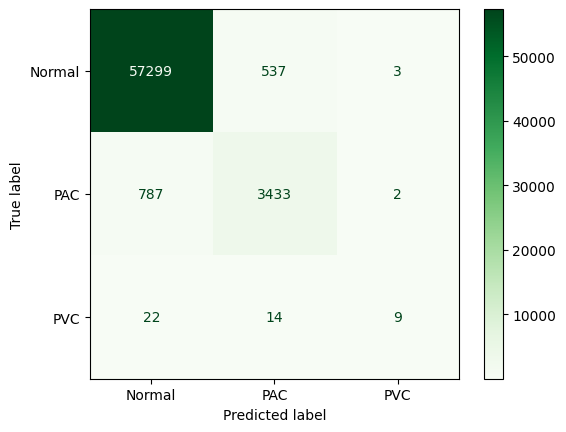

<Figure size 1500x1500 with 0 Axes>

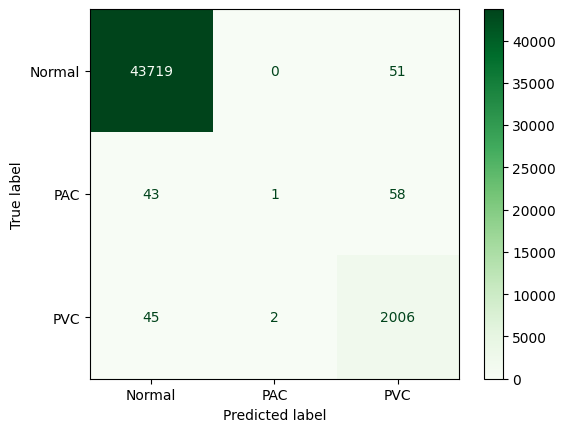

Skipped 9733.csv


<Figure size 1500x1500 with 0 Axes>

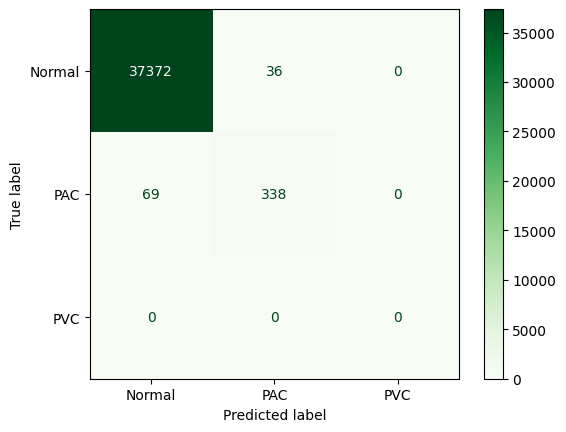

Skipped 4219.csv


<Figure size 1500x1500 with 0 Axes>

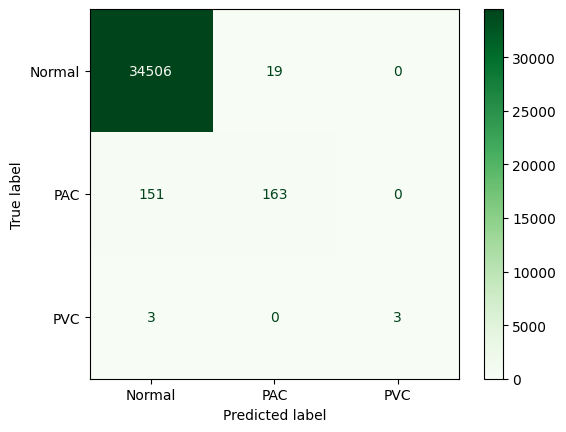

Skipped 8750.csv


<Figure size 1500x1500 with 0 Axes>

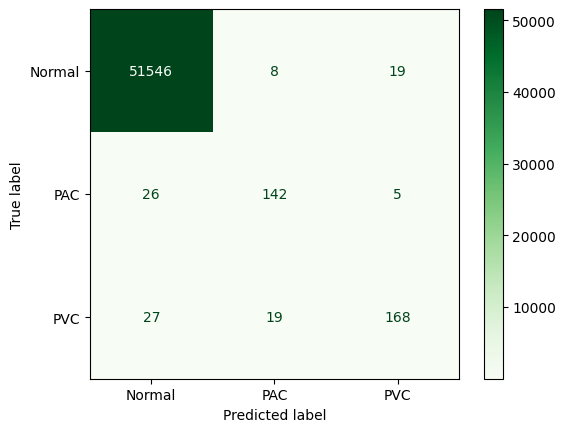

Skipped 8111.csv


<Figure size 1500x1500 with 0 Axes>

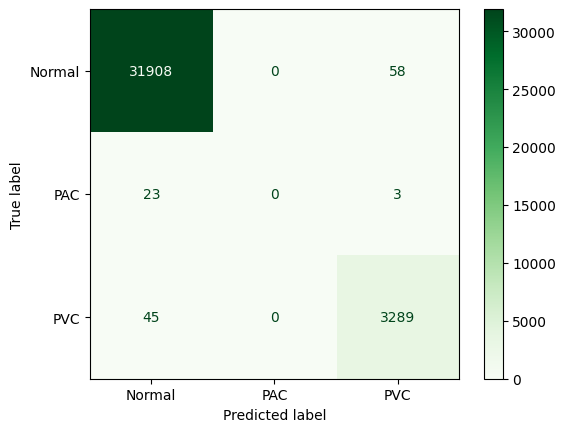

Skipped 5015.csv


<Figure size 1500x1500 with 0 Axes>

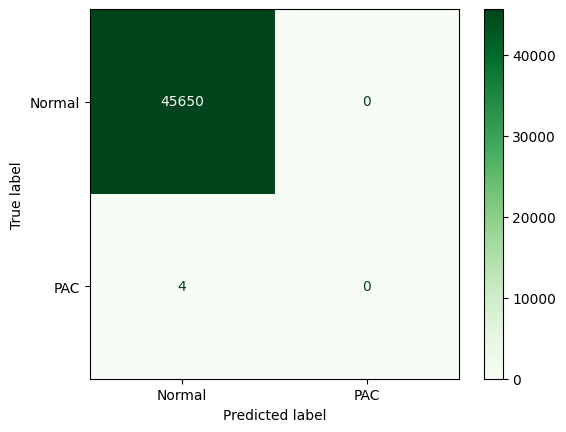

<Figure size 1500x1500 with 0 Axes>

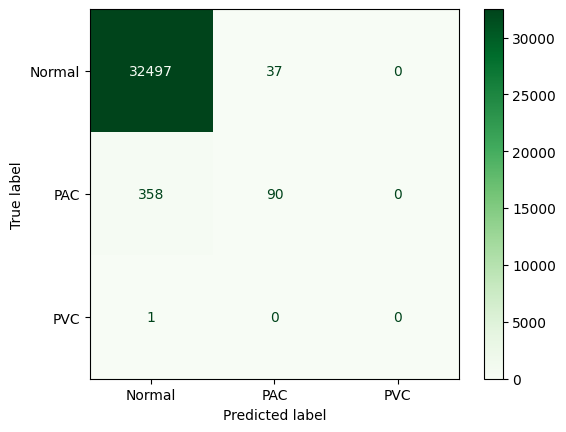

<Figure size 1500x1500 with 0 Axes>

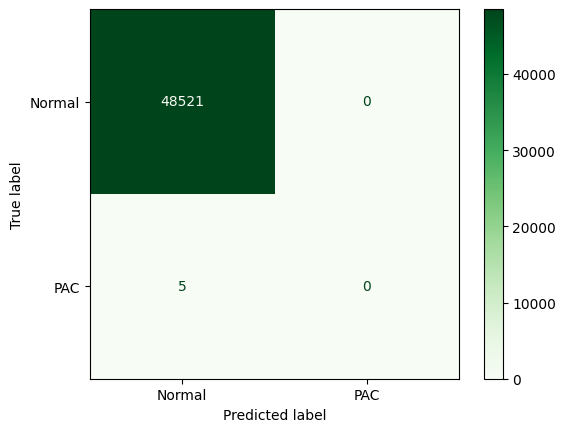

Skipped 10503.csv


<Figure size 1500x1500 with 0 Axes>

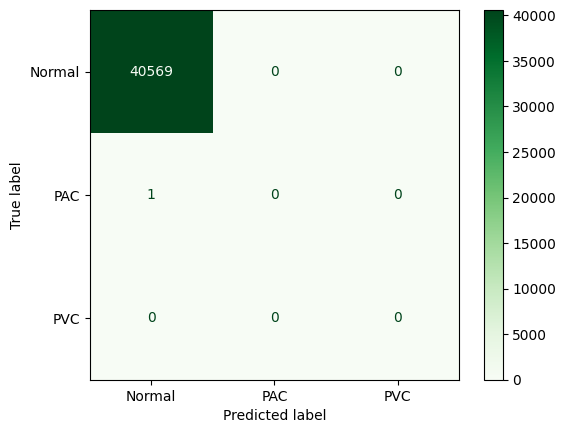

<Figure size 1500x1500 with 0 Axes>

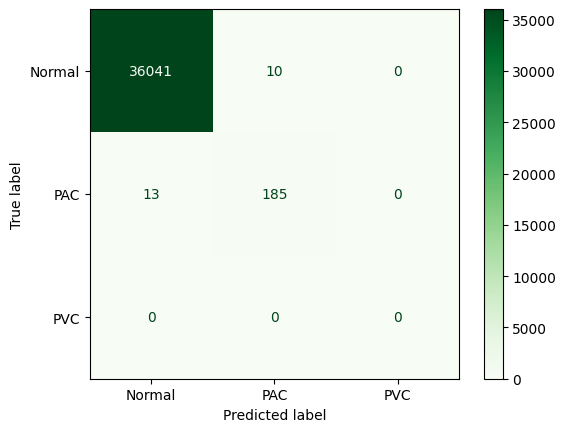

<Figure size 1500x1500 with 0 Axes>

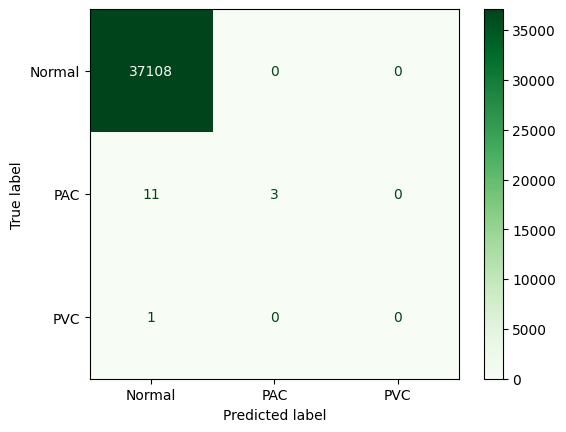

<Figure size 1500x1500 with 0 Axes>

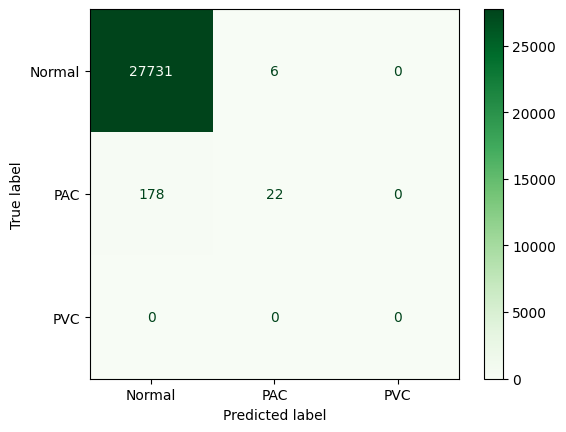

Skipped 8366.csv


<Figure size 1500x1500 with 0 Axes>

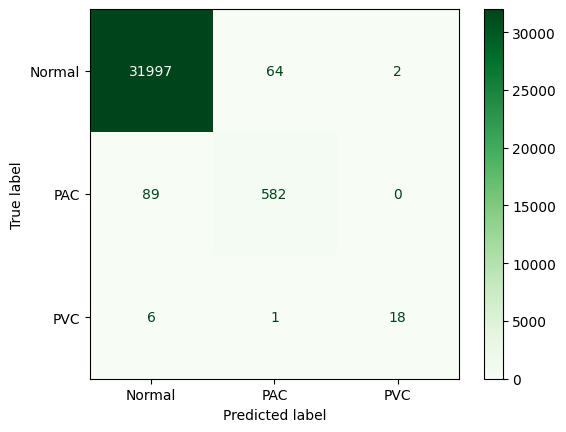

<Figure size 1500x1500 with 0 Axes>

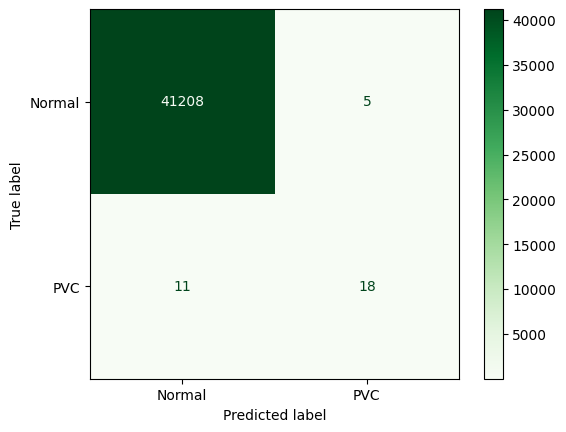

<Figure size 1500x1500 with 0 Axes>

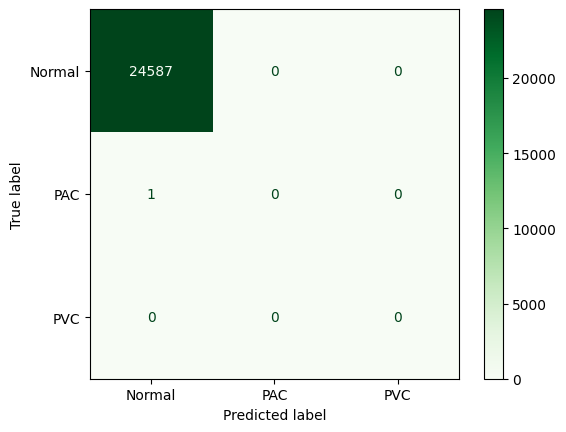

<Figure size 1500x1500 with 0 Axes>

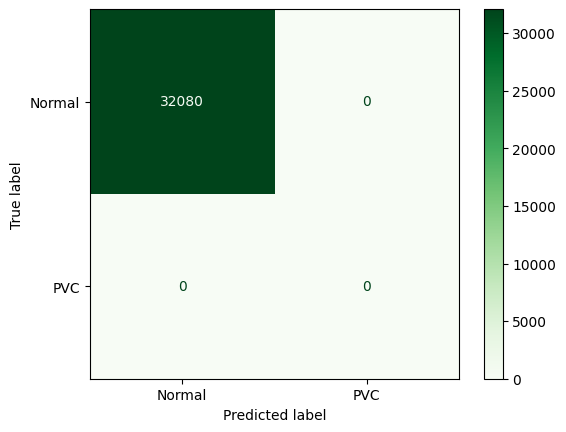

<Figure size 1500x1500 with 0 Axes>

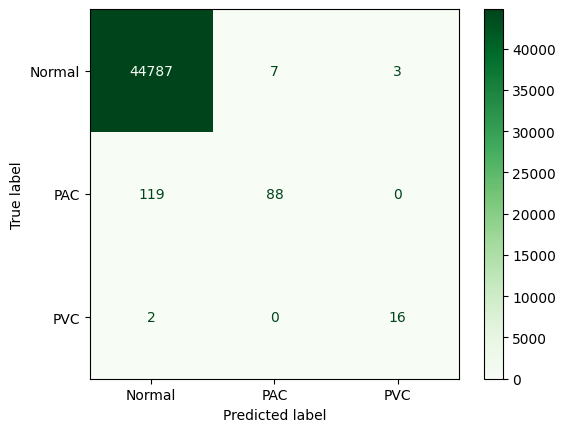

<Figure size 1500x1500 with 0 Axes>

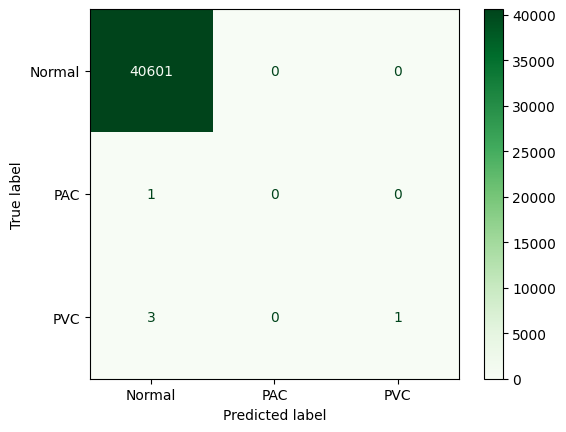

<Figure size 1500x1500 with 0 Axes>

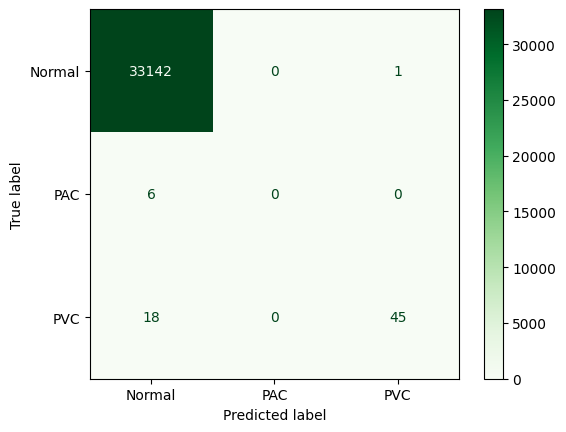

Skipped 4993.csv


<Figure size 1500x1500 with 0 Axes>

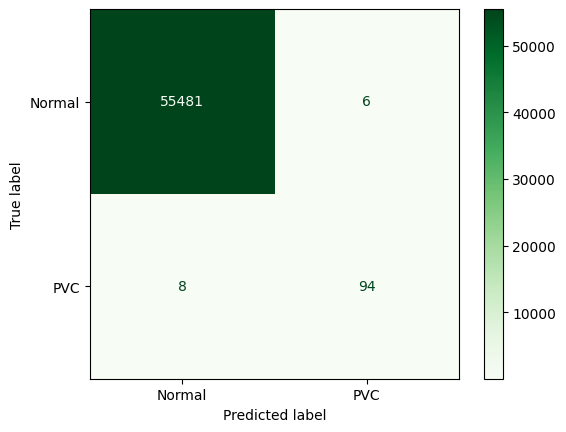

Skipped 9403.csv


<Figure size 1500x1500 with 0 Axes>

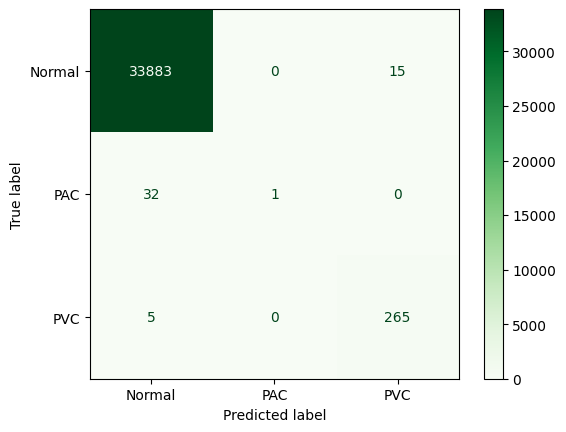

<Figure size 1500x1500 with 0 Axes>

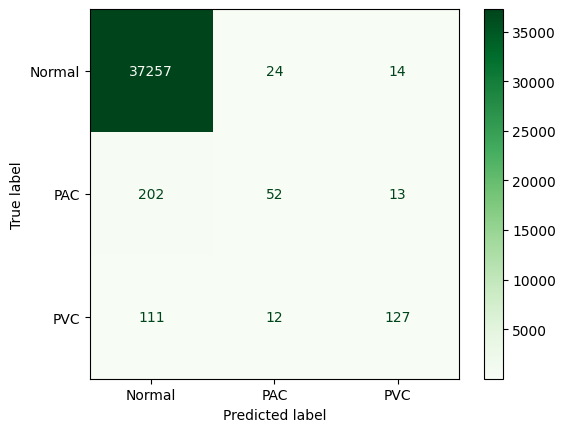

<Figure size 1500x1500 with 0 Axes>

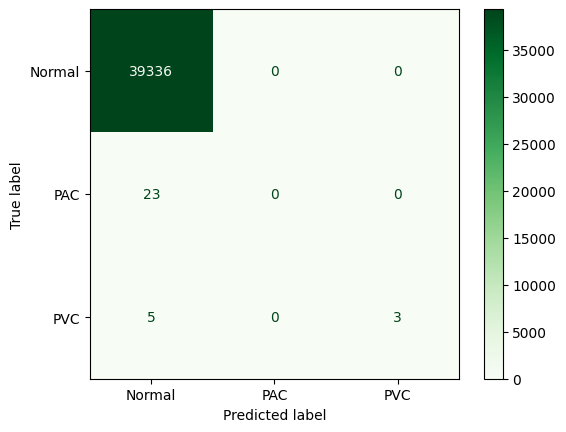

<Figure size 1500x1500 with 0 Axes>

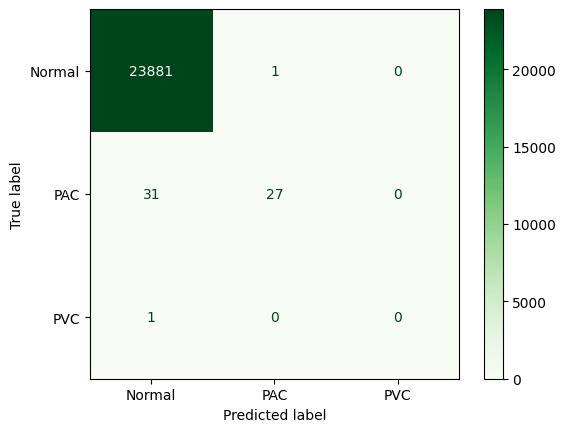

Skipped 9886.csv


<Figure size 1500x1500 with 0 Axes>

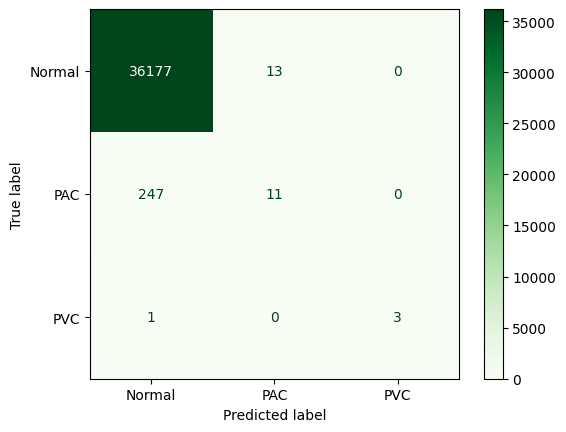

<Figure size 1500x1500 with 0 Axes>

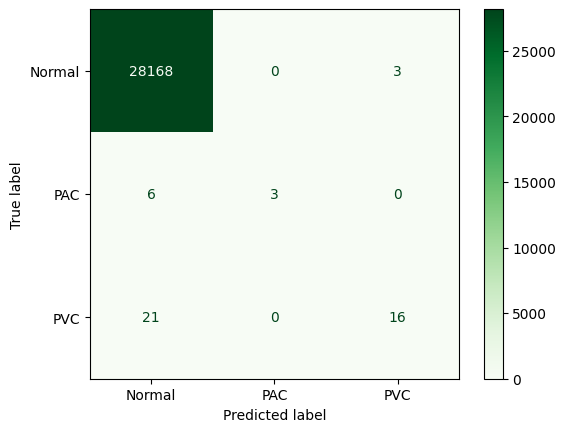

<Figure size 1500x1500 with 0 Axes>

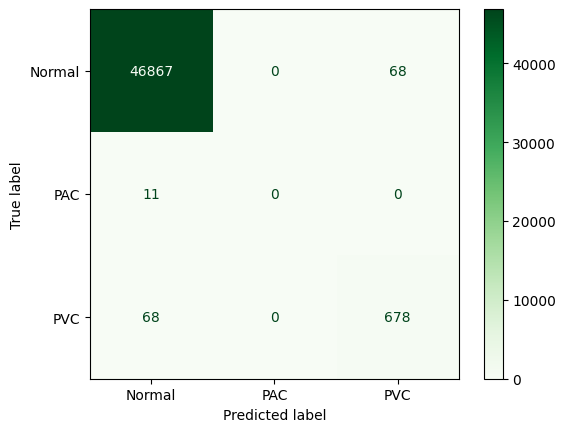

<Figure size 1500x1500 with 0 Axes>

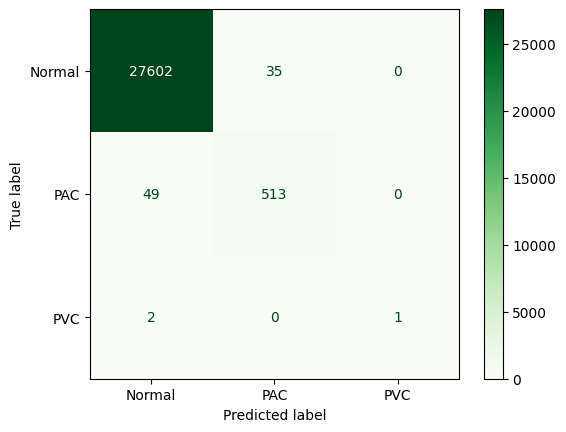

<Figure size 1500x1500 with 0 Axes>

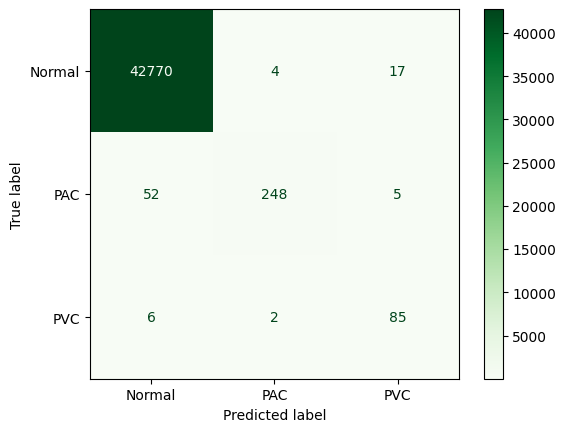

<Figure size 1500x1500 with 0 Axes>

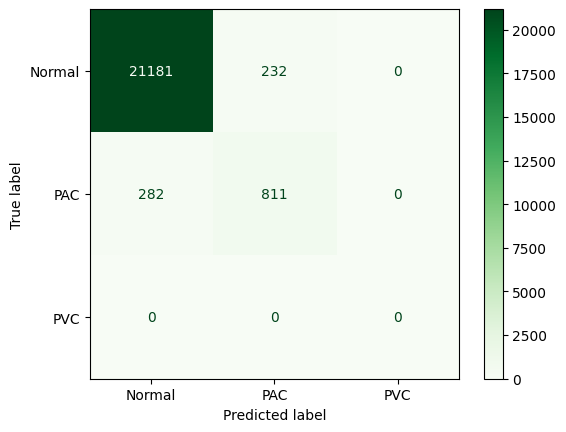

<Figure size 1500x1500 with 0 Axes>

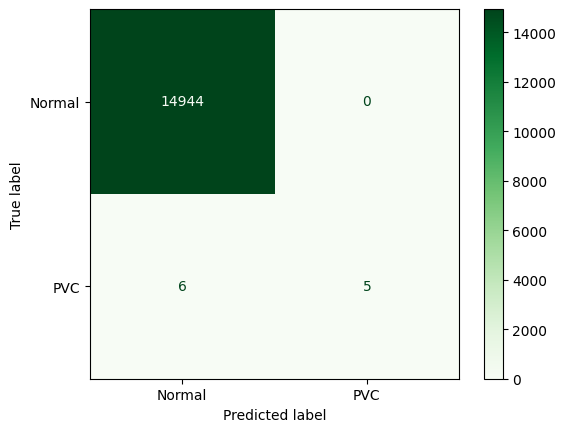

<Figure size 1500x1500 with 0 Axes>

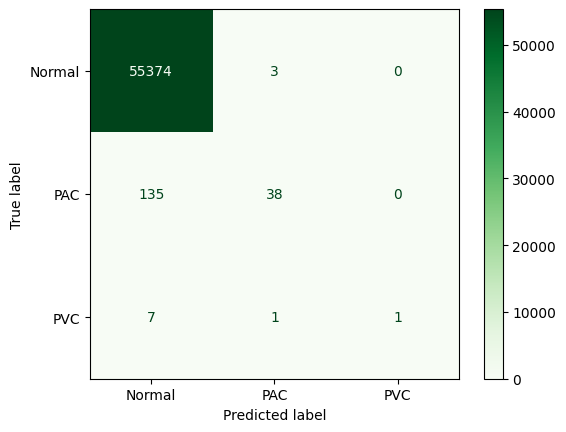

<Figure size 1500x1500 with 0 Axes>

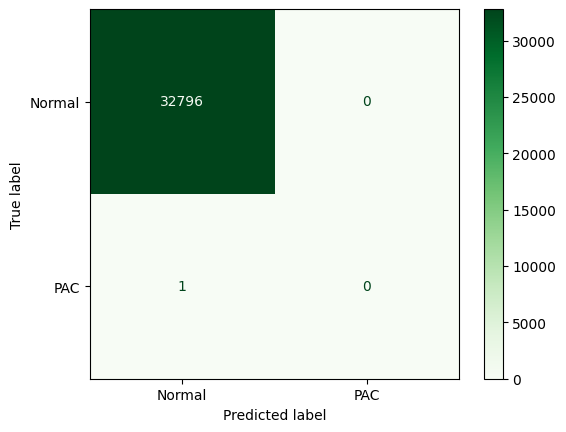

<Figure size 1500x1500 with 0 Axes>

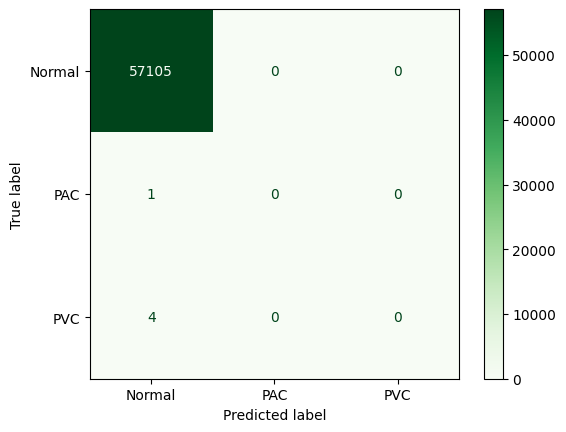

<Figure size 1500x1500 with 0 Axes>

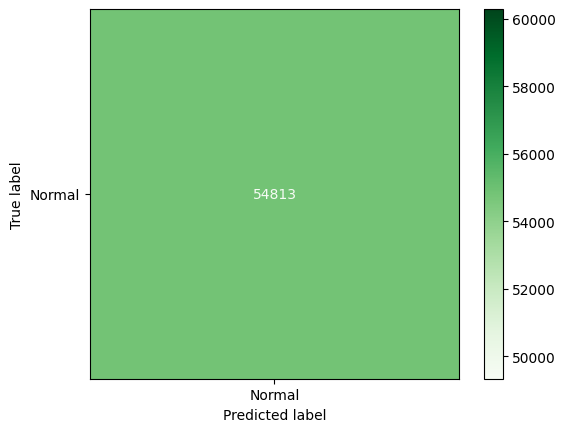

<Figure size 1500x1500 with 0 Axes>

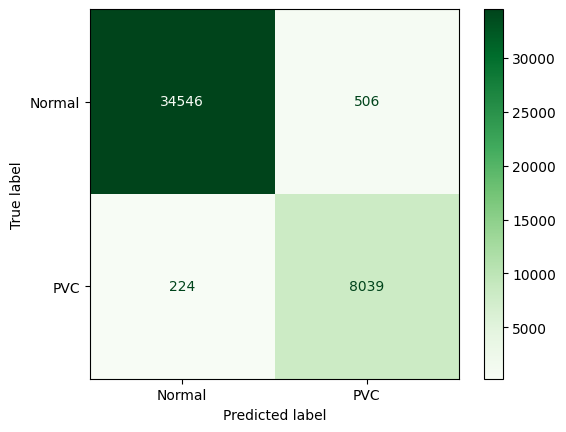

<Figure size 1500x1500 with 0 Axes>

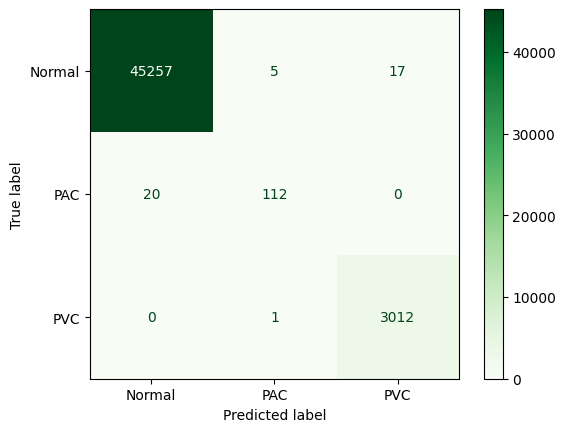

<Figure size 1500x1500 with 0 Axes>

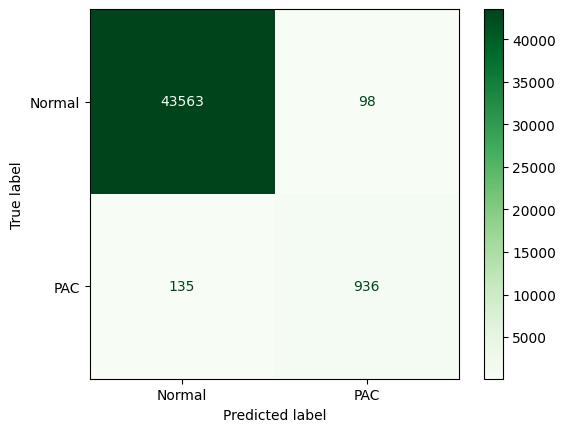

<Figure size 1500x1500 with 0 Axes>

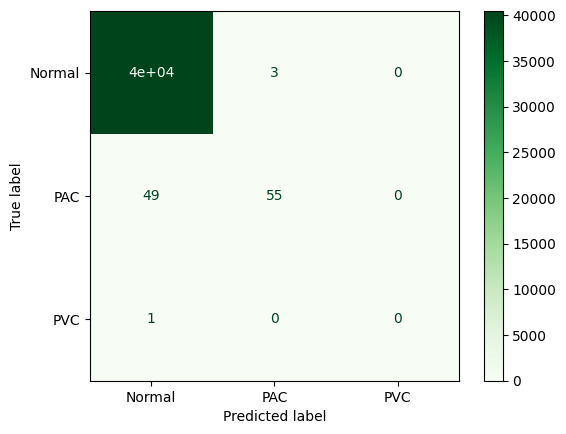

<Figure size 1500x1500 with 0 Axes>

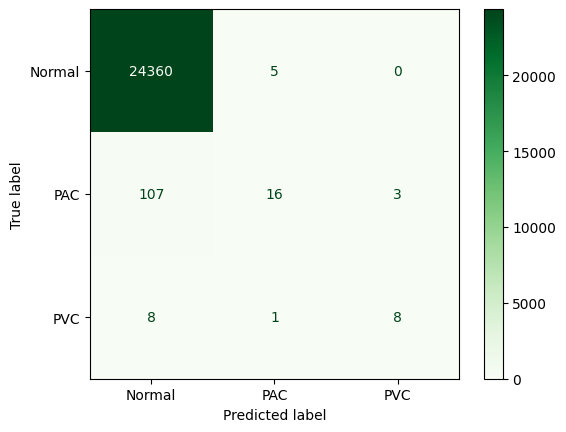

Skipped 33.csv


<Figure size 1500x1500 with 0 Axes>

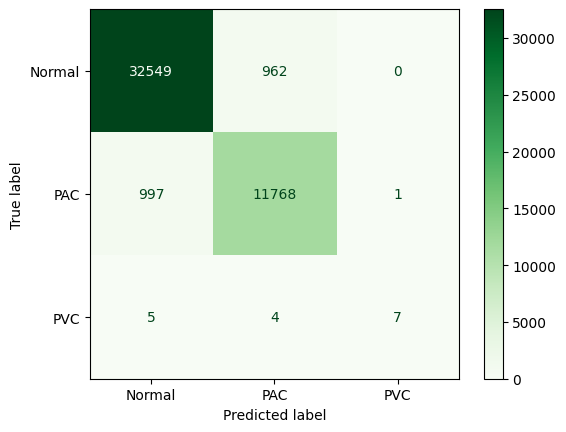

<Figure size 1500x1500 with 0 Axes>

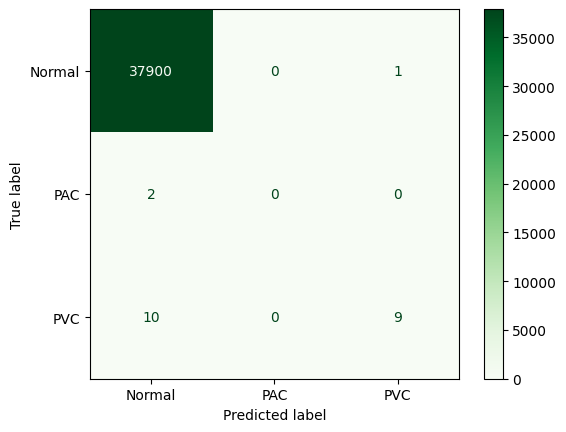

<Figure size 1500x1500 with 0 Axes>

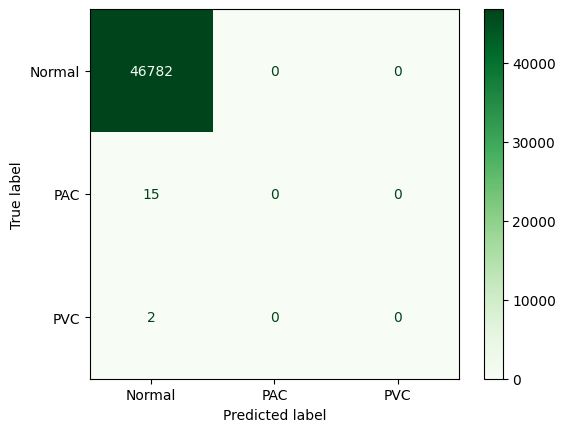

<Figure size 1500x1500 with 0 Axes>

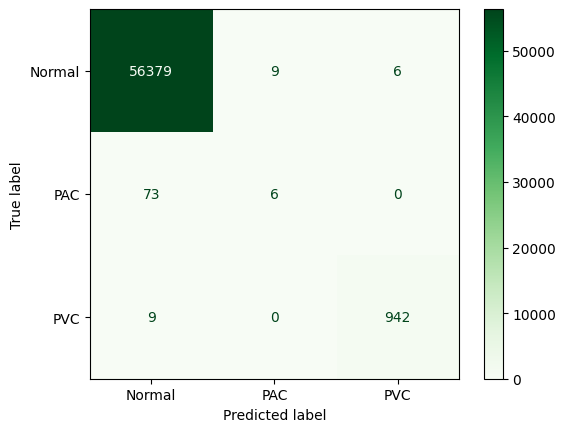

<Figure size 1500x1500 with 0 Axes>

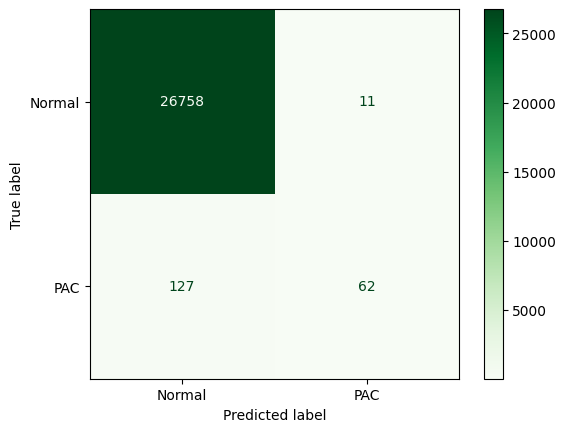

<Figure size 1500x1500 with 0 Axes>

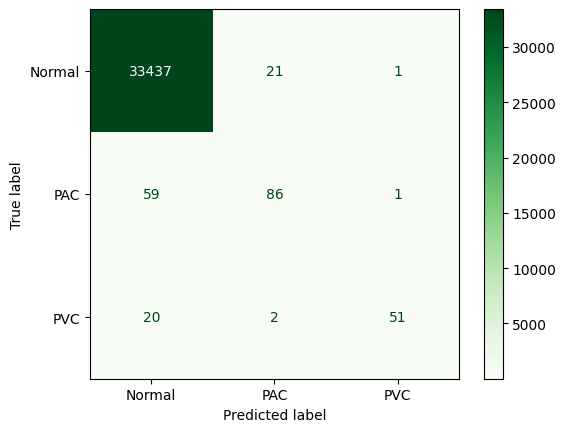

<Figure size 1500x1500 with 0 Axes>

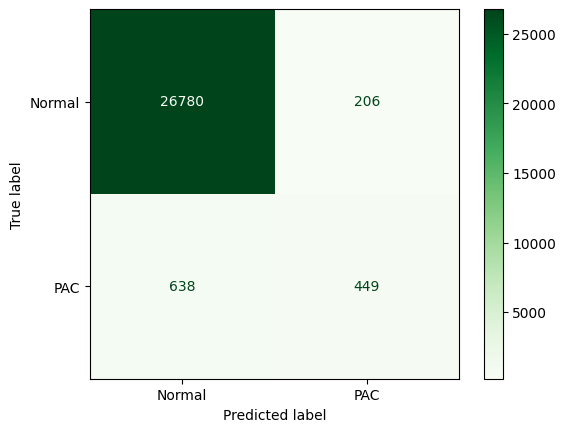

<Figure size 1500x1500 with 0 Axes>

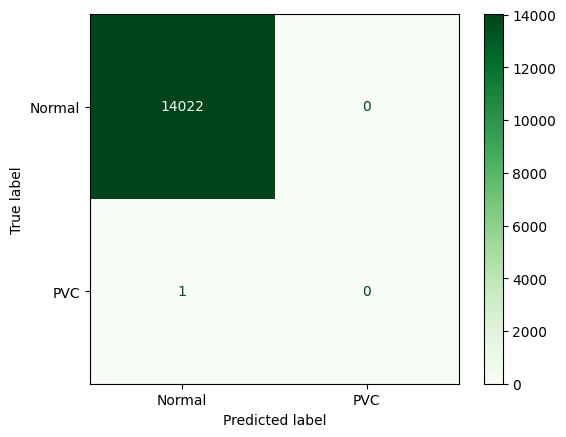

<Figure size 1500x1500 with 0 Axes>

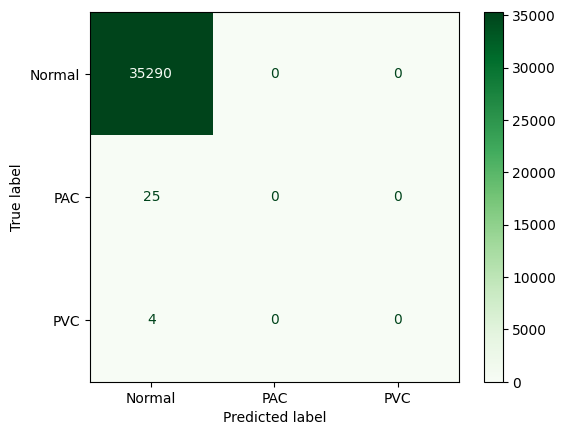

<Figure size 1500x1500 with 0 Axes>

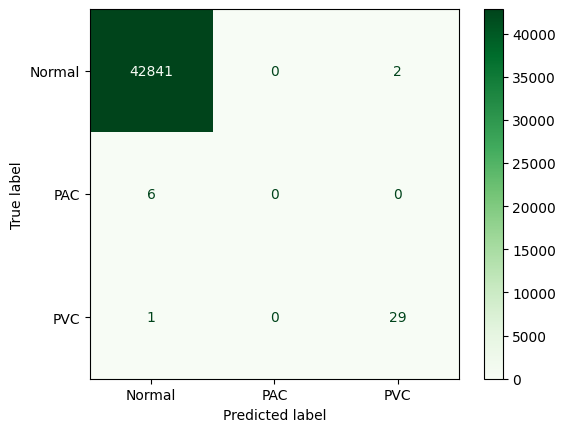

<Figure size 1500x1500 with 0 Axes>

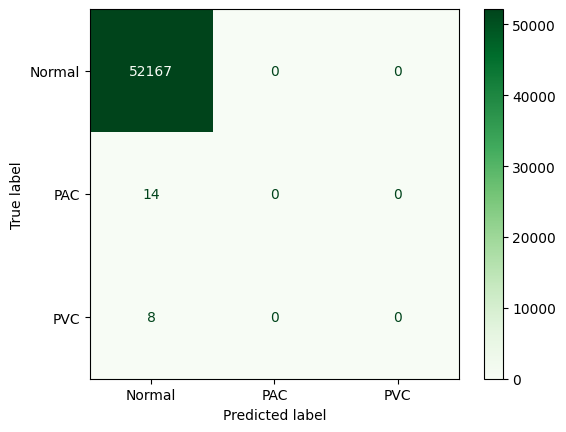

<Figure size 1500x1500 with 0 Axes>

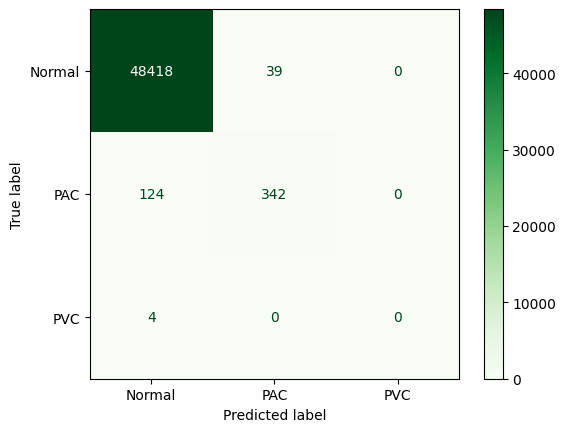

<Figure size 1500x1500 with 0 Axes>

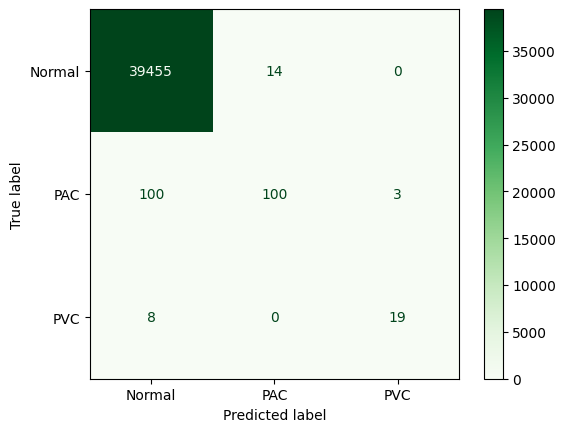

<Figure size 1500x1500 with 0 Axes>

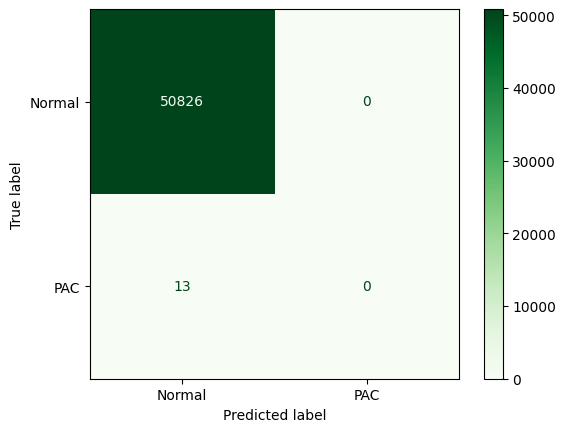

Skipped 4786.csv


<Figure size 1500x1500 with 0 Axes>

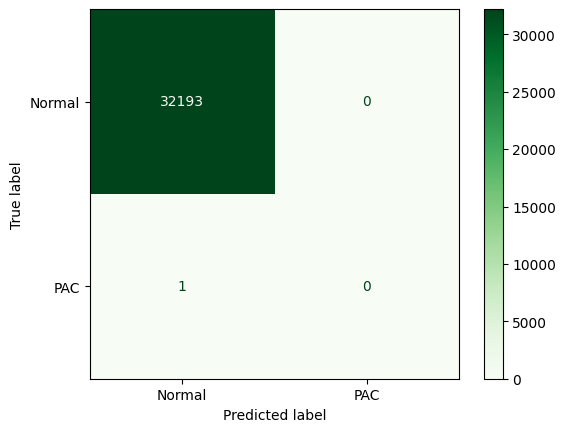

<Figure size 1500x1500 with 0 Axes>

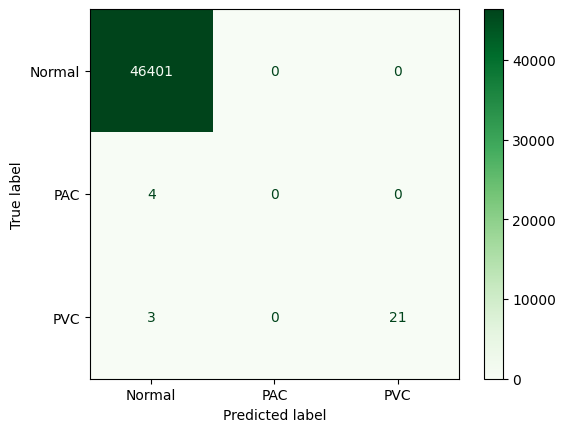

In [121]:
for k in glob.glob('./embedding_personalization/*.csv'):
    try:
        df_pers = pd.read_csv(k)
        df_pers.beat = df_pers.beat.replace(0.0, 'Normal').replace(1.0, 'Unclassified').replace(2.0, 'PAC').replace(3.0, 'PVC')
        df_pers = df_pers[df_pers.beat != 'Unclassified'].drop('Unnamed: 0', axis=1)
        print(df_pers.groupby('beat')['beat'].count())
    
        X_train, X_test, y_train, y_test = train_test_split(
                df_pers.iloc[:, :ld],
                df_pers.beat,
                test_size=0.2,
                random_state=42,
                stratify=df_pers.beat,
            )
        cm, classes = plot_confustion_matrix(
            X_train, X_test, y_train, y_test,
            KNeighborsClassifier(n_neighbors=13),
            '../analysis/media/test.png',
        )
        pd.DataFrame(cm, columns=classes, index=classes).to_csv('./result/' + k.split('/')[-1])
    except:
        print('Skipped', k.split('/')[-1])
        continue

In [18]:
import glob

In [19]:
df = pd.DataFrame()
df_unbiased = pd.DataFrame()
files = glob.glob('./personalization/confusion_matrices/*.csv')
for i, k in enumerate(files):
    if i == 0:
        temp = pd.read_csv(k, index_col=0)
        df = temp
        df_unbiased = temp.div(temp.sum(axis=1), axis=0)
    else:
        temp = pd.read_csv(k, index_col=0)
        if ('PAC' in temp.columns) & ('PVC' in temp.columns):
            '''
            if temp.loc['PAC', 'PAC'] > 500:
                print('Sample', k)
                print(temp)
            '''
            df = df.add(temp, fill_value=0)
            df_unbiased.add(temp.div(temp.sum(axis=1), axis=0), fill_value=0)

In [20]:
df.div(df.sum(axis=1), axis=0).round(4)

Normal     PAC     PVC
Normal  0.9989  0.0009  0.0001
PAC     0.2059  0.7900  0.0041
PVC     0.0475  0.0052  0.9473

In [21]:
df_unbiased.round(4)

Normal     PAC     PVC
Normal  0.9976  0.0023  0.0000
PAC     0.1470  0.8439  0.0091
PVC     0.0857  0.3143  0.6000

In [197]:
for subject in subjects:
    print(subject)
    df = pd.read_csv('./embedding_personalization/' + str(subject) + '.csv', index_col=0)
    X_embedded = TSNE(n_components=2).fit_transform(df.iloc[:, 0:ld])
    X_embedded = pd.DataFrame(X_embedded, columns=['Projected Axis 1', 'Projected Axis 2'])
    X_embedded['beat'] = df.beat
    X_embedded['segment'] = df.segment
    X_embedded.beat = X_embedded.beat.replace(0.0, 'Normal').replace(1.0, 'Unclassified').replace(2.0, 'PAC').replace(3.0, 'PVC')
    X_embedded = X_embedded[X_embedded.beat != 'Unclassified']
    cols = {'beat': 'Beat'}
    X_embedded = X_embedded.rename(columns=cols)
    X_embedded.to_csv('./tsne/' + str(subject) + '.csv')

1851
2602
10973
5938
10146
9225


In [84]:
df = pd.DataFrame()
for path in glob.glob('./tsne/*.csv'):
    subject = path.split('/')[-1][:-4]
    X_embedded = pd.read_csv(path, index_col=0)
    X_embedded['subject'] = subject
    df = pd.concat([df, X_embedded])

In [85]:
df.reset_index(drop=True, inplace=True)

In [86]:
cols = {'subject': 'Subject'}
df = df.rename(columns=cols)

In [87]:
df.Subject = df.Subject.astype(int)

In [88]:
df = df.sort_values('Subject')

In [89]:
df.groupby(['Subject', 'Beat'])['segment'].count()

Subject  Beat  
1851     Normal    159832
         PAC          129
         PVC        16669
2602     Normal    160315
         PAC         3356
         PVC          124
5938     Normal    281969
         PAC          397
         PVC         4754
9225     Normal    180255
         PAC          987
         PVC            2
10146    Normal    226396
         PAC          659
         PVC        15063
10973    Normal    167555
         PAC        63827
         PVC           79
Name: segment, dtype: int64

In [90]:
df.head()

Projected Axis 1  Projected Axis 2    Beat  segment  Subject
50         63.841960         -8.608589  Normal     43.0     1851
51         64.343370         70.373840  Normal     42.0     1851
52        -25.400139         -9.569356  Normal     11.0     1851
53        -77.401690         -9.468987  Normal      2.0     1851
54         11.483170         41.359100  Normal      9.0     1851

In [96]:
custom_sort_order = [2602, 9225, 10973, 1851, 5938, 10146]

In [97]:
df['Subject'] = pd.Categorical(df['Subject'], categories=custom_sort_order, ordered=True)

In [100]:
df = df.sort_values('Subject')

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

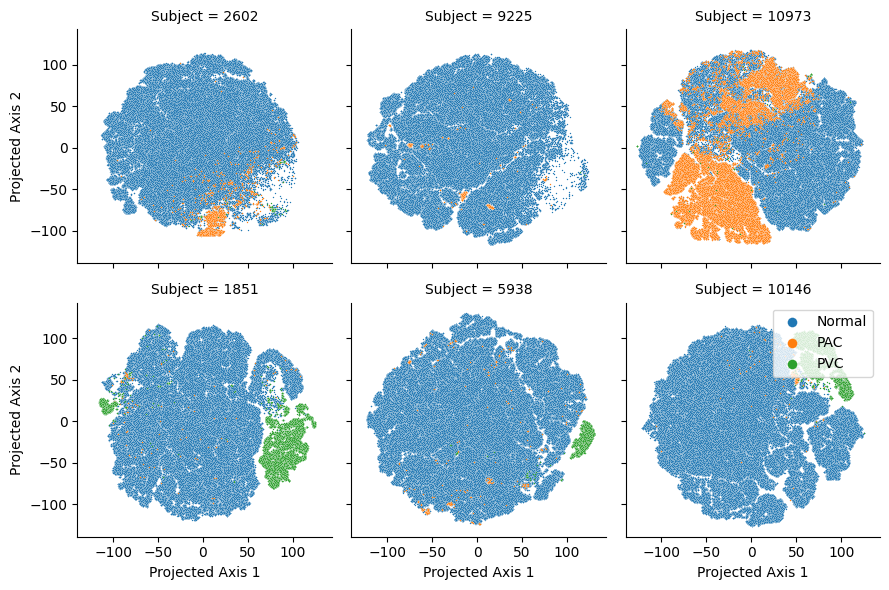

In [175]:
plt.figure(figsize=(15,10))
g = sns.FacetGrid(df, col="Subject", col_wrap=3, palette=palette, hue="Beat")
g.map(sns.scatterplot, "Projected Axis 1", "Projected Axis 2", s=1)

plt.legend(markerscale=7)
fig = g.figure
fig.savefig('../media/tsne_embedding_personalization_d.png' , dpi=300, bbox_inches = 'tight')

In [22]:
df = Helper.get_icentia_embedding(subjects, model)

276/276 [==============================] - 9s 34ms/step


In [26]:
ld=12

In [ ]:
.iloc[:, :ld]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
        df,
        df.subject,
        test_size=0.2,
        random_state=42,
        stratify=df.subject,
    )

In [69]:
X_embedded = TSNE(n_components=2).fit_transform(X_test.iloc[:,:ld].fillna(0.0))

In [70]:
X_embedded = pd.DataFrame(X_embedded, columns=['Projected Axis 1', 'Projected Axis 2'])

In [71]:
X_embedded['Beat'] = X_test.beat.values

In [72]:
X_embedded['Subject'] = y_test.values

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

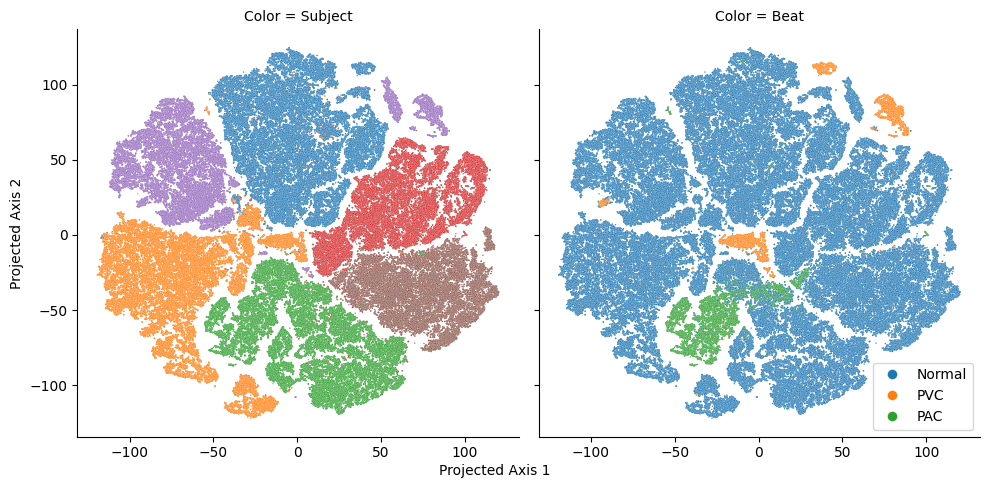

In [73]:
df_melted = pd.melt(X_embedded, id_vars=['Projected Axis 1', 'Projected Axis 2'], 
                    value_vars=['Subject', 'Beat'], 
                    var_name='Color', value_name='Color_')

plt.figure(figsize=(15,10))
g = sns.FacetGrid(df_melted, col='Color', height=5, aspect=1)

# Map the scatterplot
g.map(sns.scatterplot, 'Projected Axis 1', 'Projected Axis 2', 'Color_', s=1)

g.set_axis_labels("")

n_cols = g.axes.shape[0]

for i, ax in enumerate(g.axes.flat):
    if i < len(g.axes.flat) - n_cols:
        ax.set_xlabel('') 

g.fig.text(0.5, 0.04, 'Projected Axis 1', ha='center')

plt.legend(markerscale=7)
fig = g.figure
fig.savefig('../analysis/media/embedding_icentia.png' , dpi=300, bbox_inches = 'tight')

In [87]:
df_pers = pd.DataFrame()
for k in splits:
    df_per = pd.read_csv('./personalization/embeddings_vae/' + k + '.csv') #pd.read_csv(k)
    df_per.beat = df_per.beat.replace(0.0, 'Normal').replace(1.0, 'Unclassified').replace(2.0, 'PAC').replace(3.0, 'PVC')
    df_per = df_per[df_per.beat != 'Unclassified'].drop('Unnamed: 0', axis=1)
    df_pers = pd.concat([df_pers, df_per])
df_pers.reset_index(drop=True, inplace=True)

In [89]:
cols = {
    '4': 'S-wave and Q-Wave (width)', '5': 'P-wave (height, width)', 'split': 'Subject', 'beat': 'Beat',
}
df_pers = df_pers.rename(columns=cols)

In [90]:
df_pers.reset_index(drop=True, inplace=True)

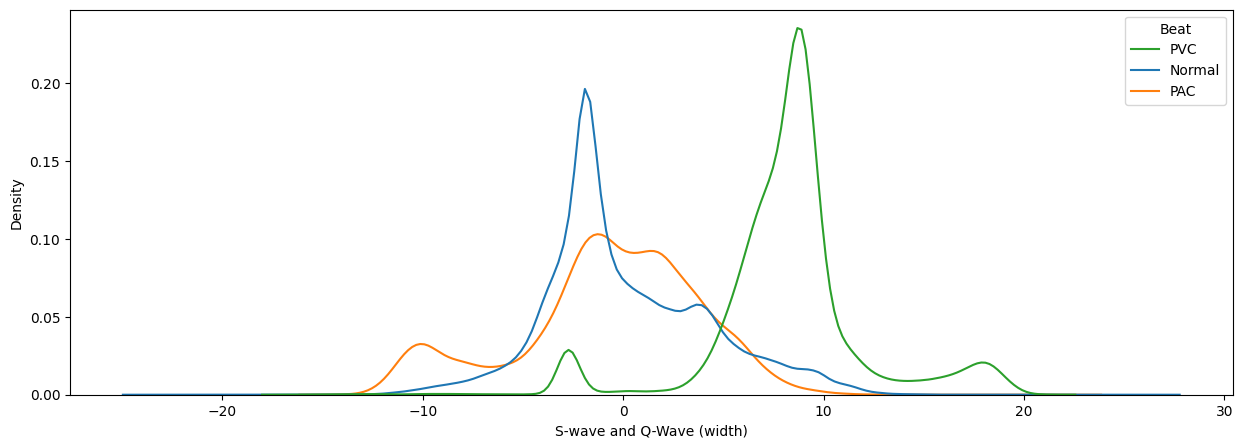

In [81]:
plt.figure(figsize=(15,5))
g = sns.kdeplot(df_pers, x="S-wave and Q-Wave (width)", hue="Beat", common_norm=False, palette=palette)
fig = g.figure
fig.savefig('../analysis/media/distribution_personalization_all.png' , dpi=300, bbox_inches = 'tight')

In [82]:
df_pers_pac = df_pers[df_pers.Subject.isin([2602, 9225, 10973])]
df_pers_pvc = df_pers[df_pers.Subject.isin([1851, 5938, 10146])]

In [83]:
df_pers_pac = df_pers_pac.sort_values('Subject')
df_pers_pvc = df_pers_pvc.sort_values('Subject')

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


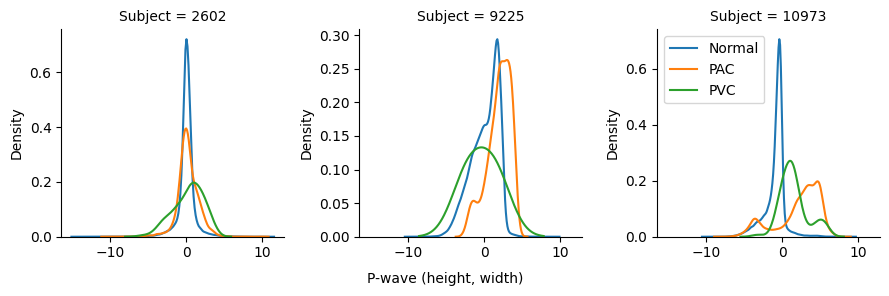

In [84]:
g = sns.FacetGrid(df_pers_pac, col="Subject", col_wrap=3, hue="Beat", palette=palette, sharey=False)
g.map(sns.kdeplot, "P-wave (height, width)", common_norm=False, warn_singular=False)

g.set_axis_labels("") 
#g.set_titles("{col_name}")

n_cols = g.axes.shape[0]

for i, ax in enumerate(g.axes.flat):
    if i < len(g.axes.flat) - n_cols:
        ax.set_xlabel('') 

g.fig.text(0.5, 0.04, 'P-wave (height, width)', ha='center')
plt.legend()
fig = g.figure
plt.show()
fig.savefig('../analysis/media/distribution_pac.png' , dpi=300, bbox_inches = 'tight')

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


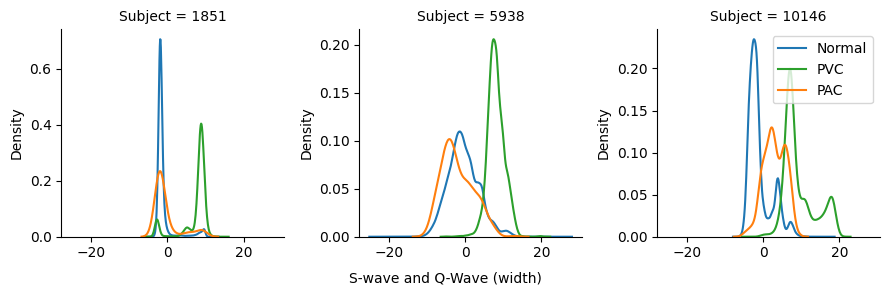

In [85]:
g = sns.FacetGrid(df_pers_pvc, col="Subject", col_wrap=3, hue="Beat", palette=palette, sharey=False)
g.map(sns.kdeplot, "S-wave and Q-Wave (width)", common_norm=False, warn_singular=False)
g.set_axis_labels("")
#g.set_titles("{col_name}")

n_cols = g.axes.shape[0]

for i, ax in enumerate(g.axes.flat):
    if i < len(g.axes.flat) - n_cols:
        ax.set_xlabel('') 

g.fig.text(0.5, 0.04, 'S-wave and Q-Wave (width)', ha='center')
plt.legend()
fig = g.figure
plt.show()
fig.savefig('../analysis/media/distribution_pvc.png' , dpi=300, bbox_inches = 'tight')

In [ ]:
for i, k in enumerate(df_pers.columns[:ld]):
    g = sns.FacetGrid(df_pers, col="Subject", col_wrap=9, hue="Beat", sharey=False, palette=palette)
    g.map(sns.kdeplot, k, common_norm=False, warn_singular=False)
    plt.legend()
    fig = g.figure
    fig.savefig('../analysis/media/distribution_personalization_all_' + str(i) + '.png' , dpi=300, bbox_inches = 'tight')

/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/mnt/sdb/home/ml/Desktop/VECG/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
